In [1]:
library(miloR)
library(SingleCellExperiment)
library(scater)
library(dplyr)
library(patchwork)

Loading required package: edgeR

Loading required package: limma

Loading required package: SummarizedExperiment

Loading required package: MatrixGenerics

Loading required package: matrixStats


Attaching package: ‘MatrixGenerics’


The following objects are masked from ‘package:matrixStats’:

    colAlls, colAnyNAs, colAnys, colAvgsPerRowSet, colCollapse,
    colCounts, colCummaxs, colCummins, colCumprods, colCumsums,
    colDiffs, colIQRDiffs, colIQRs, colLogSumExps, colMadDiffs,
    colMads, colMaxs, colMeans2, colMedians, colMins, colOrderStats,
    colProds, colQuantiles, colRanges, colRanks, colSdDiffs, colSds,
    colSums2, colTabulates, colVarDiffs, colVars, colWeightedMads,
    colWeightedMeans, colWeightedMedians, colWeightedSds,
    colWeightedVars, rowAlls, rowAnyNAs, rowAnys, rowAvgsPerColSet,
    rowCollapse, rowCounts, rowCummaxs, rowCummins, rowCumprods,
    rowCumsums, rowDiffs, rowIQRDiffs, rowIQRs, rowLogSumExps,
    rowMadDiffs, rowMads, rowMaxs, rowMeans2, rowMedi

In [9]:
source('../00_preprocessing/preprocessing.R')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.7          ✔ purrr   0.3.4     
✔ tidyr   1.2.0          ✔ stringr 1.4.0     
✔ readr   2.1.2          ✔ forcats 0.5.2.9000

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::collapse()   masks IRanges::collapse()
✖ dplyr::combine()    masks Biobase::combine(), BiocGenerics::combine()
✖ dplyr::count()      masks matrixStats::count()
✖ dplyr::desc()       masks IRanges::desc()
✖ tidyr::expand()     masks S4Vectors::expand()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::first()      masks S4Vectors::first()
✖ dplyr::lag()        masks stats::lag()
✖ ggplot2::Position() masks BiocGenerics::Position(), base::Position()
✖ purrr::reduce()     masks GenomicRanges::reduce(), IRanges::reduce()
✖ dplyr::rename()     masks S4Vectors::rename()
✖ dplyr::slice()      masks IRanges::slice()



In [456]:
obj = qs::qread('../00_preprocessing/_targets/objects/exp_labelled_other')
obj

Loading required package: SeuratObject

Attaching sp


Attaching package: ‘SeuratObject’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays


Loading required package: Seurat


Attaching package: ‘Seurat’


The following object is masked from ‘package:SummarizedExperiment’:

    Assays




An object of class Seurat 
56583 features across 37179 samples within 3 assays 
Active assay: SCT (24262 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [11]:
# obj <- obj[, sample(colnames(obj), size = 10000, replace=F)]
obj = subset(obj, subset = labels %in% c("MOL"))
obj = Seurat::SCTransform(obj,
                        assay='RNA',
                        method="glmGamPoi",
                        vars.to.regress="batch",
                        vst.flavor="v2",
                        verbose=TRUE)
obj = run_sct_chaser(obj, resolution=0.8)
obj

vst.flavor='v2' set, setting model to use fixed slope and exclude poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Total Step 1 genes: 17447

Total overdispersed genes: 14666

Excluding 2781 genes from Step 1 because they are not overdispersed.

Variance stabilizing transformation of count matrix of size 17447 by 4023

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 4023 cells



  |======================================================================| 100%


Setting estimate of  0 genes to inf as theta_mm/theta_mle < 1e-3

# of step1 poisson genes (variance < mean): 0

# of low mean genes (mean < 0.001): 0

Total # of Step1 poisson genes (theta=Inf; variance < mean): 0

Total # of poisson genes (theta=Inf; variance < mean): 2781

Calling offset model for all 2781 poisson genes

Found 2 outliers - those will be ignored in fitting/regularization step


Ignoring theta inf genes

Replacing fit params for 2781 poisson genes by theta=Inf

Setting min_variance based on median UMI:  0.04

Second step: Get residuals using fitted parameters for 17447 genes



  |======================================================================| 100%


Computing corrected count matrix for 17447 genes



  |======================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 1.657436 mins

Determine variable features

Place corrected count matrix in counts slot

Regressing out batch

Centering data matrix

Set default assay to SCT

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..SCTransform.RNA; see ?make.names for more details on syntax validity"
Warning message:
"The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session"
11:05:13 UMAP embedding parameters a = 0.9922 b = 1.112

11:05:13 Read 4023 rows and found 30 numeric columns

11:05:13 Using Annoy for neighbor search, n_neighbors = 30

11:05:13 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|

An object of class Seurat 
49768 features across 4023 samples within 3 assays 
Active assay: SCT (17447 features, 3000 variable features)
 2 other assays present: RNA, integrated
 2 dimensional reductions calculated: pca, umap

In [12]:
obj@meta.data = obj@meta.data %>% mutate(batch = stringr::str_replace_all(batch, stringr::fixed(" "), '__'))

In [13]:
obj@meta.data$group = interaction(obj@meta.data$treatment, obj@meta.data$time, obj@meta.data$strain, drop = TRUE)

In [14]:
obj@meta.data$group %>% unique()

[1] FGF1.Day14.obob   Veh_PF.Day5.BL6   Veh_PF.Day5.obob  Veh_PF.Day14.obob
[5] Veh_PF.Day14.BL6  FGF1.Day5.obob   
6 Levels: Veh_PF.Day14.BL6 Veh_PF.Day5.BL6 ... Veh_PF.Day5.obob

In [15]:
sce = as.SingleCellExperiment(obj)
sce

class: SingleCellExperiment 
dim: 17447 4023 
metadata(0):
assays(2): counts logcounts
rownames(17447): Lypla1 Tcea1 ... ENSMUSG00000095742 ENSMUSG00000095041
rowData names(0):
colnames(4023): ATTACTCTCCGCGGAT_1_1 AGTTCGAAGAAACCAT_1_1 ...
  AGGCATTGTCATCGGC_5_3 TGTAGACCAATGAAAC_5_3
colData names(36): orig.ident nCount_RNA ... group ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(2): RNA integrated

In [16]:
obob_milo <- Milo(sce)

#build KNN graph
obob_milo <- buildGraph(obob_milo, k=40, d=30, reduced.dim = 'PCA')

#define neighbourhoods
obob_milo <- makeNhoods(obob_milo, prop = 0.1, k= 40, d=30, refined = T, reduced_dims = 'PCA')

Constructing kNN graph with k:40

Checking valid object

Running refined sampling with reduced_dim



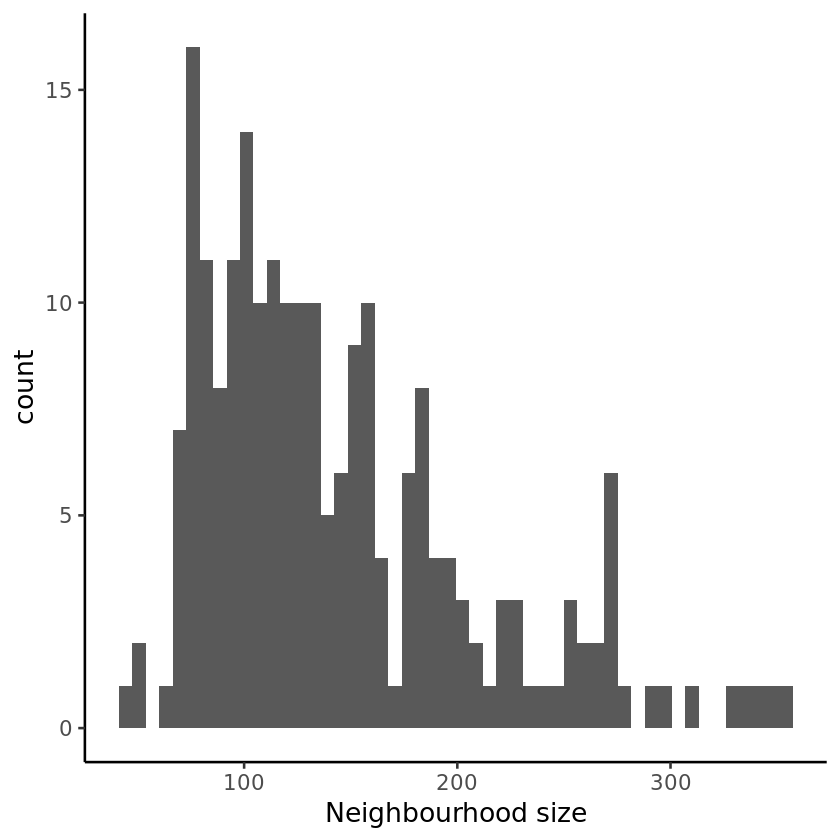

In [17]:
#plot neighbourhood sizes to check if we used appropriate k for graph building
  #we want to have an average size over 5 x N_samples
  #we have 171 samples - but not all samples will be in all neighbourhoods because of age variance
plotNhoodSizeHist(obob_milo)

Checking meta.data validity

Counting cells in neighbourhoods



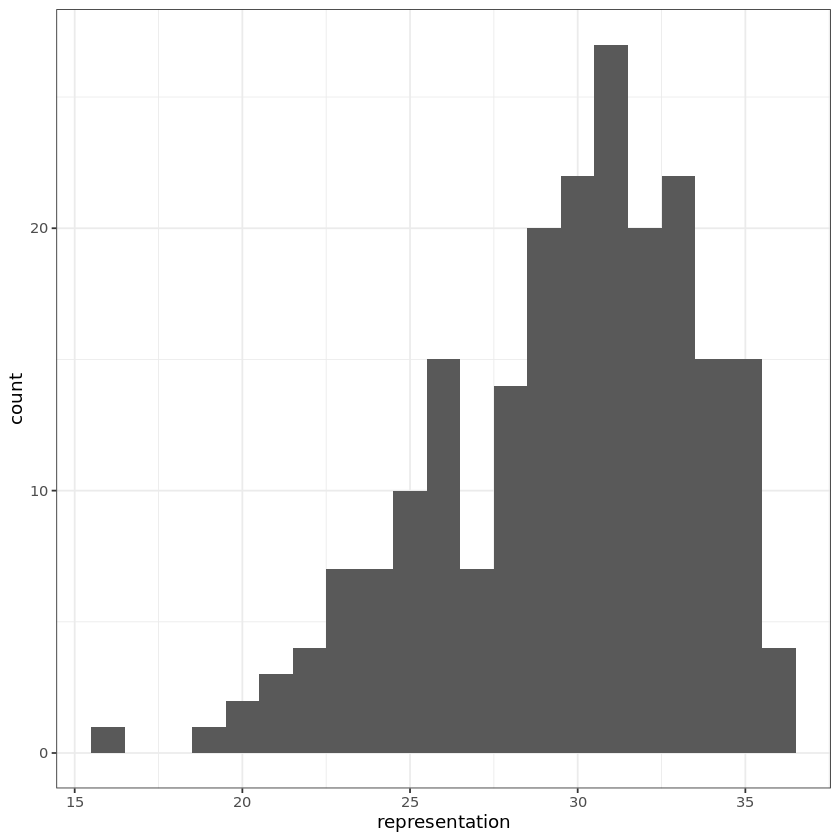

In [18]:
#add a n x m matrix to the milo object with number of neighbourhodds and samples
obob_milo <- countCells(obob_milo, meta.data = as.data.frame(colData(obob_milo)), sample = 'hash.mcl.ID')

#calculate sample representation in each neighbourhood
cell_counts <- as.data.frame(nhoodCounts(obob_milo)) %>% mutate(representation = rowSums(.>0))

#view distribution of N_samples in each neigbourhood
ggplot(cell_counts, aes(x = representation)) + 
  geom_histogram(binwidth = 1) + theme_bw()


In [3]:
obob_design <- data.frame(colData(obob_milo))[, c('hash.mcl.ID', 'group', 'batch')]
#convert seq-pool to factor
obob_design$batch <- as.factor(obob_design$batch)
#keep unique rows
obob_design <- distinct(obob_design)
#change rownames
rownames(obob_design) <- obob_design$hash.mcl.ID
head(obob_design)

hash.mcl.ID group             batch   
J11 J11         FGF1.Day14.obob   Batch__1
M4  M4          Veh_PF.Day5.BL6   Batch__1
N8  N8          Veh_PF.Day5.obob  Batch__1
M24 M24         Veh_PF.Day14.obob Batch__1
M2  M2          Veh_PF.Day5.BL6   Batch__1
M18 M18         Veh_PF.Day14.BL6  Batch__1

In [4]:
levels(obob_design$group)

[1] "Veh_PF.Day14.BL6"  "Veh_PF.Day5.BL6"   "FGF1.Day14.obob"  
[4] "Veh_PF.Day14.obob" "FGF1.Day5.obob"    "Veh_PF.Day5.obob"

In [5]:
print(obob_design)

    hash.mcl.ID             group    batch
J11         J11   FGF1.Day14.obob Batch__1
M4           M4   Veh_PF.Day5.BL6 Batch__1
N8           N8  Veh_PF.Day5.obob Batch__1
M24         M24 Veh_PF.Day14.obob Batch__1
M2           M2   Veh_PF.Day5.BL6 Batch__1
M18         M18  Veh_PF.Day14.BL6 Batch__1
N7           N7    FGF1.Day5.obob Batch__1
J2           J2 Veh_PF.Day14.obob Batch__1
M8           M8  Veh_PF.Day5.obob Batch__1
M17         M17  Veh_PF.Day14.BL6 Batch__1
M9           M9    FGF1.Day5.obob Batch__1
M13         M13   FGF1.Day14.obob Batch__1
M25         M25 Veh_PF.Day14.obob Batch__2
M29         M29 Veh_PF.Day14.obob Batch__2
M27         M27   FGF1.Day14.obob Batch__2
M5           M5   Veh_PF.Day5.BL6 Batch__2
J16         J16   FGF1.Day14.obob Batch__2
M19         M19  Veh_PF.Day14.BL6 Batch__2
N17         N17    FGF1.Day5.obob Batch__2
M23         M23   FGF1.Day14.obob Batch__2
N12         N12  Veh_PF.Day5.obob Batch__2
M10         M10    FGF1.Day5.obob Batch__2
J7         

In [6]:
length(unique(obob_design$group))

[1] 6

In [7]:
dput(unique(obob_design$group))

structure(c(3L, 2L, 6L, 4L, 1L, 5L), .Label = c("Veh_PF.Day14.BL6", 
"Veh_PF.Day5.BL6", "FGF1.Day14.obob", "Veh_PF.Day14.obob", "FGF1.Day5.obob", 
"Veh_PF.Day5.obob"), class = "factor")


In [8]:
# store distances to nearest neighbours
# obob_milo <- calcNhoodDistance(obob_milo, d=30, reduced.dim = 'PCA')
# qs::qsave(obob_milo, 'obob_milo_other_MOL.qs')
obob_milo = qs::qread('obob_milo_other_MOL.qs')

In [9]:
# contrast.all = c("groupFGF1.Day5-groupVeh_PF.Day5")
model <- model.matrix(~0 + group + batch, data=obob_design)
# mod.contrast <- makeContrasts(contrasts=contrast.all, levels=model)
head(model)

groupVeh_PF.Day14.BL6 groupVeh_PF.Day5.BL6 groupFGF1.Day14.obob
J11 0                     0                    1                   
M4  0                     1                    0                   
N8  0                     0                    0                   
M24 0                     0                    0                   
M2  0                     1                    0                   
M18 1                     0                    0                   
    groupVeh_PF.Day14.obob groupFGF1.Day5.obob groupVeh_PF.Day5.obob
J11 0                      0                   0                    
M4  0                      0                   0                    
N8  0                      0                   1                    
M24 1                      0                   0                    
M2  0                      0                   0                    
M18 0                      0                   0                    
    batchBatch__2 batchBatch__3
J11 0             0            
M4  0             0            
N8  0             0            
M24 0             0            
M2  0             0            
M18 0             0

In [11]:
options(width=120) 
print(model)

    groupVeh_PF.Day14.BL6 groupVeh_PF.Day5.BL6 groupFGF1.Day14.obob groupVeh_PF.Day14.obob groupFGF1.Day5.obob
J11                     0                    0                    1                      0                   0
M4                      0                    1                    0                      0                   0
N8                      0                    0                    0                      0                   0
M24                     0                    0                    0                      1                   0
M2                      0                    1                    0                      0                   0
M18                     1                    0                    0                      0                   0
N7                      0                    0                    0                      0                   1
J2                      0                    0                    0                      1                   0
M

In [10]:
# da_results <- testNhoods(obob_milo, design = model, design.df = obob_design) #works!
da_results <- testNhoods(obob_milo, design = model, design.df = obob_design, 
#                          model.contrasts = c("((groupVeh_PF.Day5.obob+groupVeh_PF.Day14.obob)/2) - ((groupVeh_PF.Day5.BL6+groupVeh_PF.Day14.BL6)/2)"))
                         model.contrasts = c("groupFGF1.Day5.obob - groupVeh_PF.Day5.obob"))
#                          model.contrasts = c("groupFGF1.Day5.obob - groupVeh_PF.Day5.BL6"))

da_results %>%
  arrange(SpatialFDR) %>%
  head()

table(da_results$FDR < 0.1)

Using TMM normalisation

Performing spatial FDR correction withk-distance weighting



logFC    logCPM   F        PValue       FDR          Nhood SpatialFDR  
120 3.534671 13.36497 46.65912 9.273739e-12 2.003128e-09 120   1.848029e-09
126 3.672703 12.92235 43.88641 3.780422e-11 4.082856e-09 126   3.683068e-09
14  2.511117 13.67178 31.97902 1.629754e-08 1.173423e-06  14   1.046587e-06
82  2.496702 13.47312 24.19051 8.956791e-07 4.836667e-05  82   4.237200e-05
202 2.341544 13.08142 23.13076 1.550164e-06 6.696707e-05 202   5.884459e-05
86  2.815645 12.51698 19.88889 8.356072e-06 3.008186e-04  86   2.670481e-04


FALSE  TRUE 
  150    66 

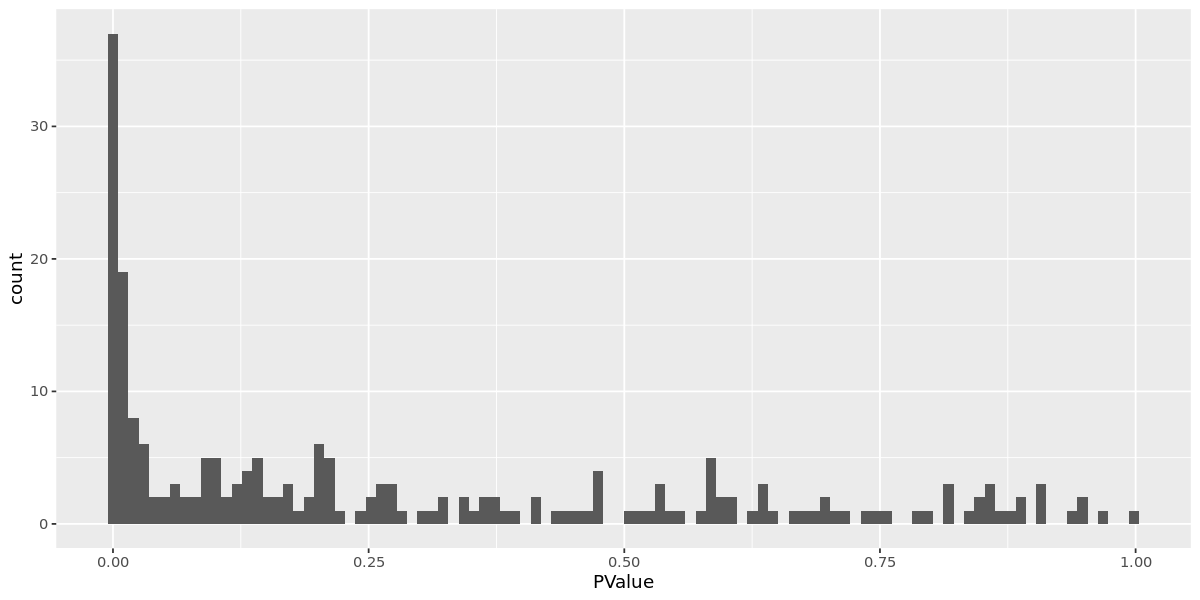

In [183]:
ggplot(da_results, aes(PValue)) + geom_histogram(bins=100)

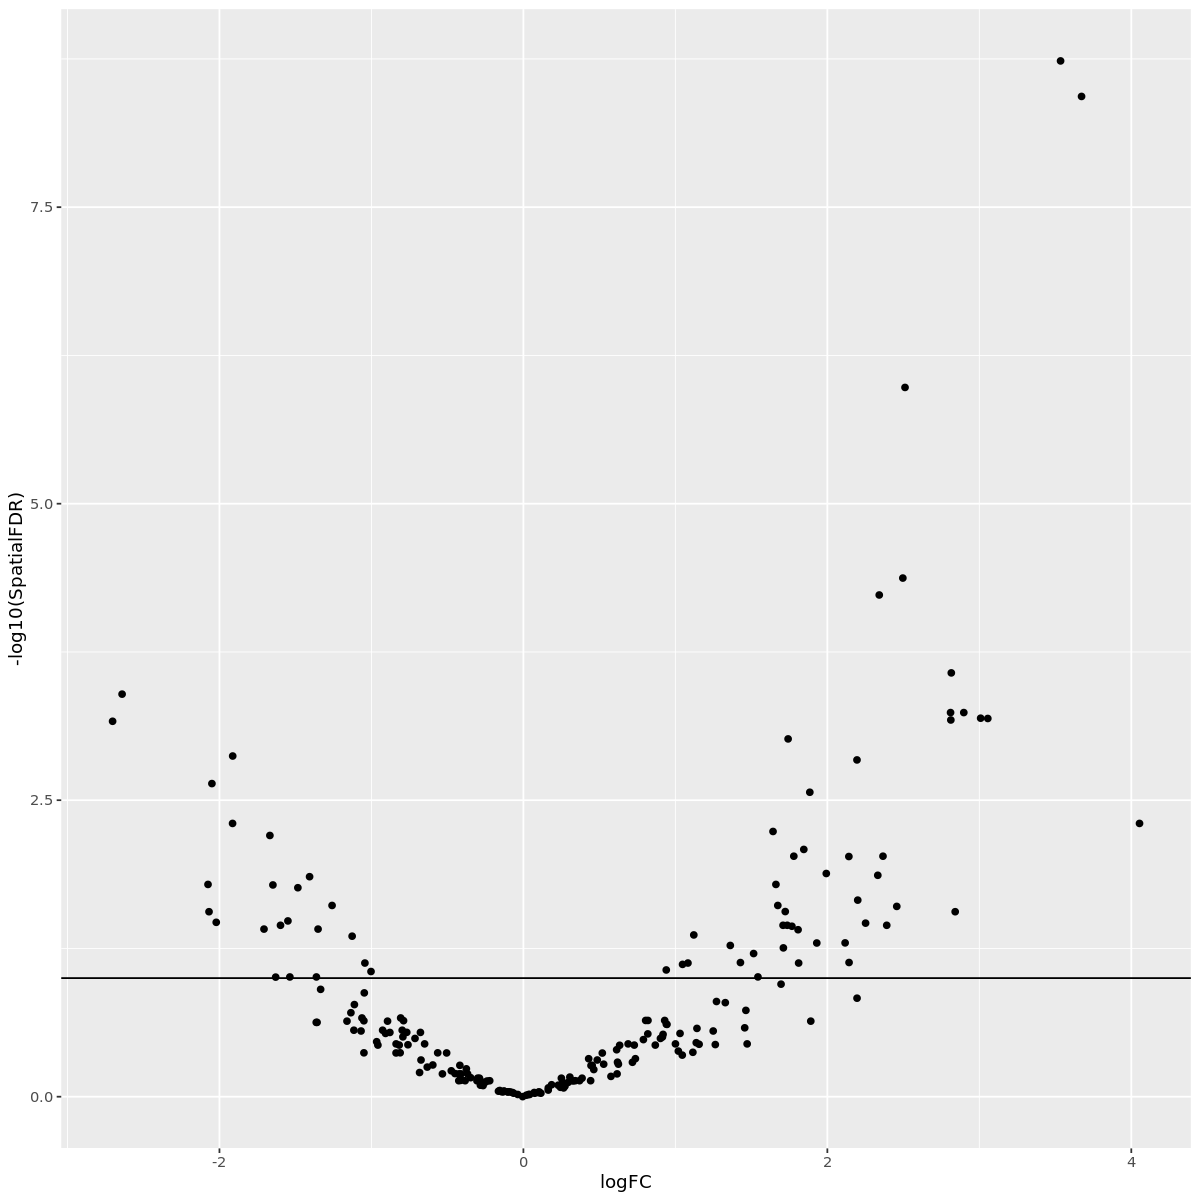

In [184]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(da_results, aes(logFC, -log10(SpatialFDR))) + 
  geom_point() +
  geom_hline(yintercept = 1) ## Mark significance threshold (10% FDR)

In [185]:
obob_milo <- buildNhoodGraph(obob_milo)

In [186]:
head(data.frame(colData(obob_milo)))

orig.ident nCount_RNA nFeature_RNA Index.10x nCount_HTO nFeature_HTO Index.HTO nCount_spliced
ATTACTCTCCGCGGAT_1_1 SI-TT-A11  22867      4243         SI-TT-A11 1808       12           D706      4541          
AGTTCGAAGAAACCAT_1_1 SI-TT-A11  21398      4206         SI-TT-A11 1483       12           D706      4590          
CACGGGTGTTACACTG_1_1 SI-TT-A11  20683      4692         SI-TT-A11 1932       12           D706      3659          
GCCAACGGTTGTTTGG_1_1 SI-TT-A11  16528      4347         SI-TT-A11 3546       12           D706      2923          
CGAAGGAAGCACGATG_1_1 SI-TT-A11  13777      3094         SI-TT-A11 1326       12           D706      2838          
GTAACACCATATGGCT_1_1 SI-TT-A11  11782      3149         SI-TT-A11 1412       12           D706      2248          
                     nFeature_spliced nCount_unspliced ⋯ treatment time  collection_date isolation_date batch   
ATTACTCTCCGCGGAT_1_1 1836             18326            ⋯ FGF1      Day14 220131          22/6/2022      Batch__1
AGTTCGAAGAAACCAT_1_1 1857             16808            ⋯ Veh_PF    Day5  220329          22/6/2022      Batch__1
CACGGGTGTTACACTG_1_1 1875             17024            ⋯ FGF1      Day14 220131          22/6/2022      Batch__1
GCCAACGGTTGTTTGG_1_1 1688             13605            ⋯ Veh_PF    Day5  211214          22/6/2022      Batch__1
CGAAGGAAGCACGATG_1_1 1186             10939            ⋯ Veh_PF    Day14 220407          22/6/2022      Batch__1
GTAACACCATATGGCT_1_1 1254              9534            ⋯ Veh_PF    Day5  220329          22/6/2022      Batch__1
                     predicted.id prediction.score.max labels group             ident
ATTACTCTCCGCGGAT_1_1 MOL          1.0000000            MOL    FGF1.Day14.obob   9    
AGTTCGAAGAAACCAT_1_1 MOL          1.0000000            MOL    Veh_PF.Day5.BL6   9    
CACGGGTGTTACACTG_1_1 MOL          0.9872625            MOL    FGF1.Day14.obob   11   
GCCAACGGTTGTTTGG_1_1 MOL          0.4832757            MOL    Veh_PF.Day5.obob  11   
CGAAGGAAGCACGATG_1_1 MOL          1.0000000            MOL    Veh_PF.Day14.obob 9    
GTAACACCATATGGCT_1_1 MOL          0.9776664            MOL    Veh_PF.Day5.BL6   4

In [187]:
options(repr.plot.width=10, repr.plot.height=10)
umap_pl <- plotReducedDim(obob_milo, dimred = "UMAP", colour_by="labels", text_by = "labels", 
                          text_size = 3, point_size=0.5) +
  guides(fill="none") 

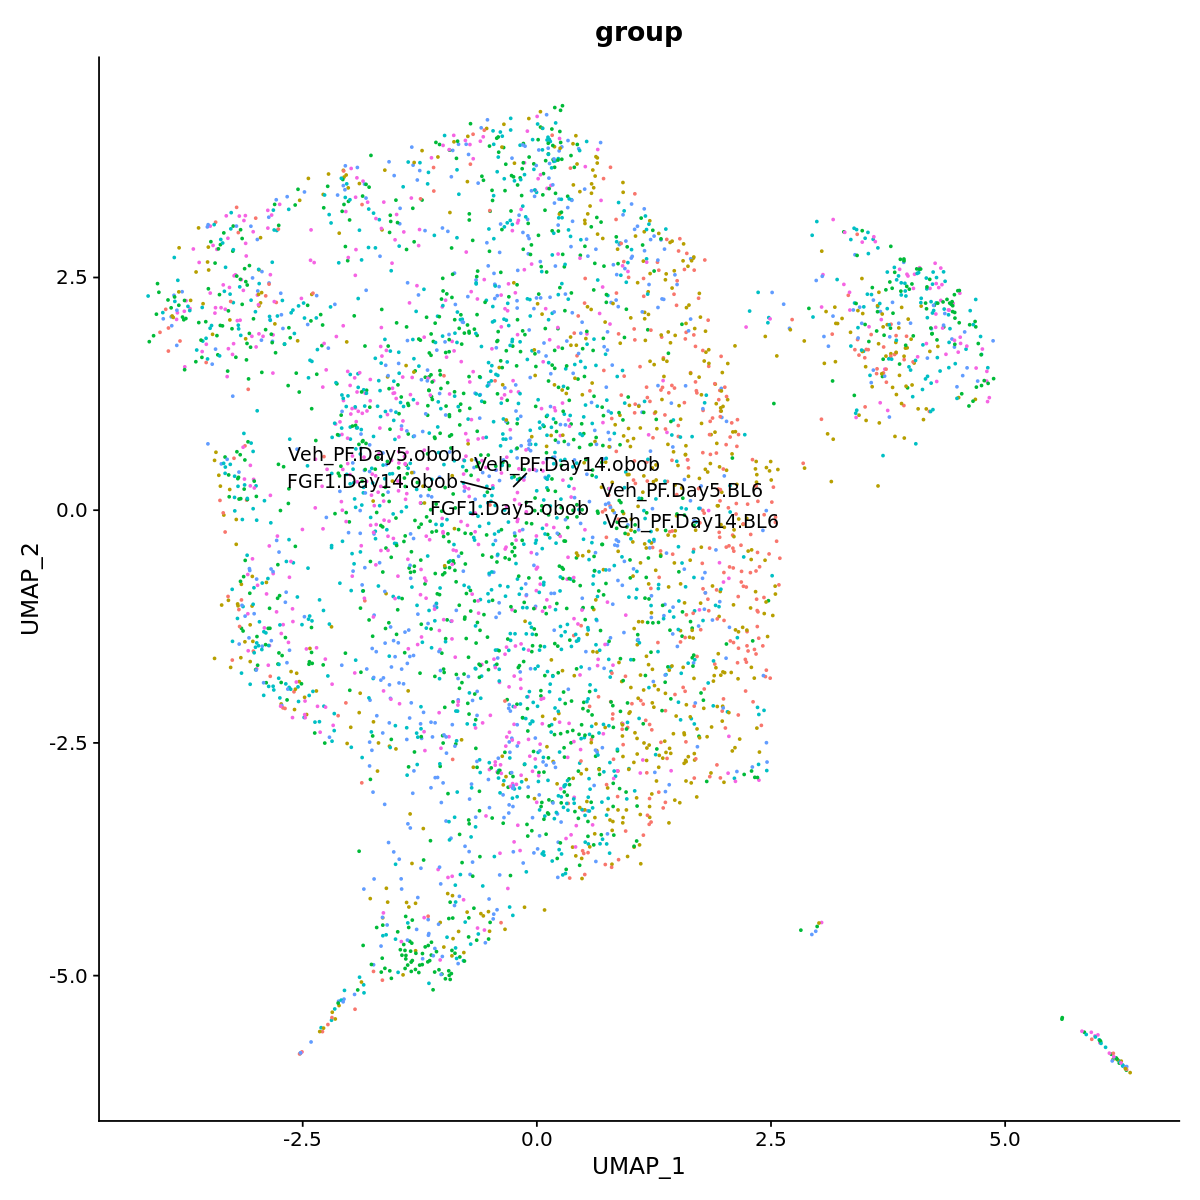

In [189]:
options(repr.plot.width=10, repr.plot.height=10)
umap_plot = DimPlot(obj, reduction = "umap", group.by = "group", label = TRUE,  repel = TRUE) + NoLegend()
umap_plot

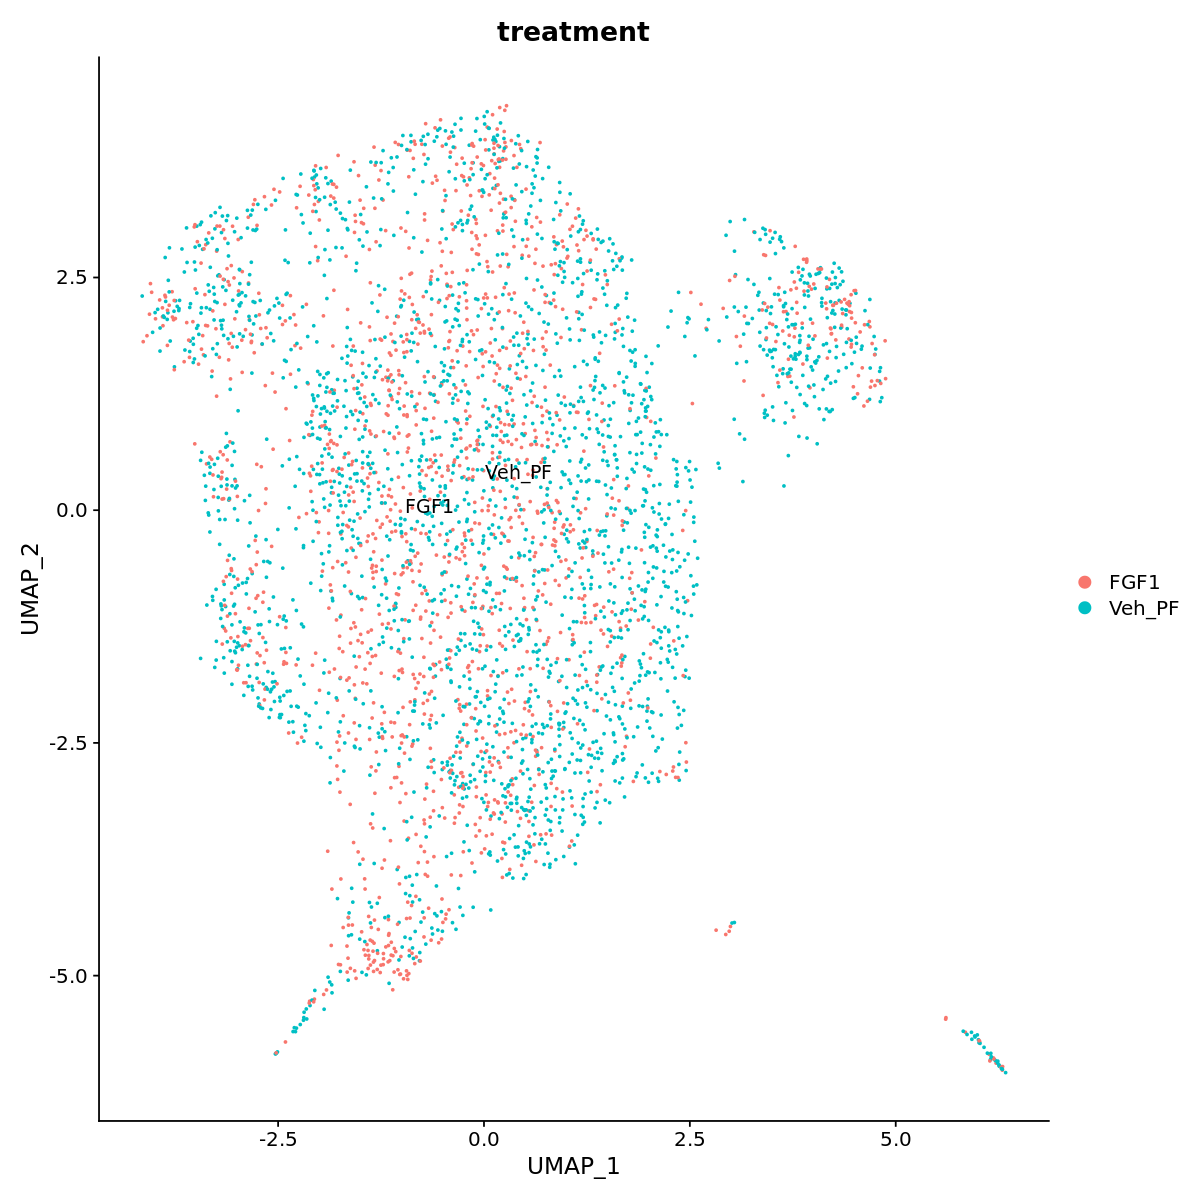

In [190]:
DimPlot(obj, reduction = "umap", group.by = "treatment", label = TRUE,  repel = TRUE)

vst.flavor='v2' set, setting model to use fixed slope and exclude poisson genes.

Calculating cell attributes from input UMI matrix: log_umi

Total Step 1 genes: 12785

Total overdispersed genes: 10913

Excluding 1872 genes from Step 1 because they are not overdispersed.

Variance stabilizing transformation of count matrix of size 12785 by 582

Model formula is y ~ log_umi

Get Negative Binomial regression parameters per gene

Using 2000 genes, 582 cells



  |==============================================================================================================| 100%


Setting estimate of  5 genes to inf as theta_mm/theta_mle < 1e-3

# of step1 poisson genes (variance < mean): 0

# of low mean genes (mean < 0.001): 0

Total # of Step1 poisson genes (theta=Inf; variance < mean): 5

Total # of poisson genes (theta=Inf; variance < mean): 1872

Calling offset model for all 1872 poisson genes

Found 5 outliers - those will be ignored in fitting/regularization step


Ignoring theta inf genes

Replacing fit params for 1872 poisson genes by theta=Inf

Setting min_variance based on median UMI:  0.04

Second step: Get residuals using fitted parameters for 12785 genes



  |==============================================================================================================| 100%


Computing corrected count matrix for 12785 genes



  |==============================================================================================================| 100%


Calculating gene attributes

Wall clock passed: Time difference of 10.33548 secs

Determine variable features

Place corrected count matrix in counts slot

Regressing out batch

Centering data matrix

Set default assay to SCT

Warning message:
"Invalid name supplied, making object name syntactically valid. New object name is Seurat..SCTransform.RNA; see ?make.names for more details on syntax validity"
14:13:31 UMAP embedding parameters a = 0.9922 b = 1.112

14:13:31 Read 582 rows and found 30 numeric columns

14:13:31 Using Annoy for neighbor search, n_neighbors = 30

14:13:31 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

14:13:31 Writing NN index file to temp file /scratch/nmq407/R_tmp//RtmpZy5kjj/file96083d110985

14:13:31 Searching Annoy index using 1 thread, sear

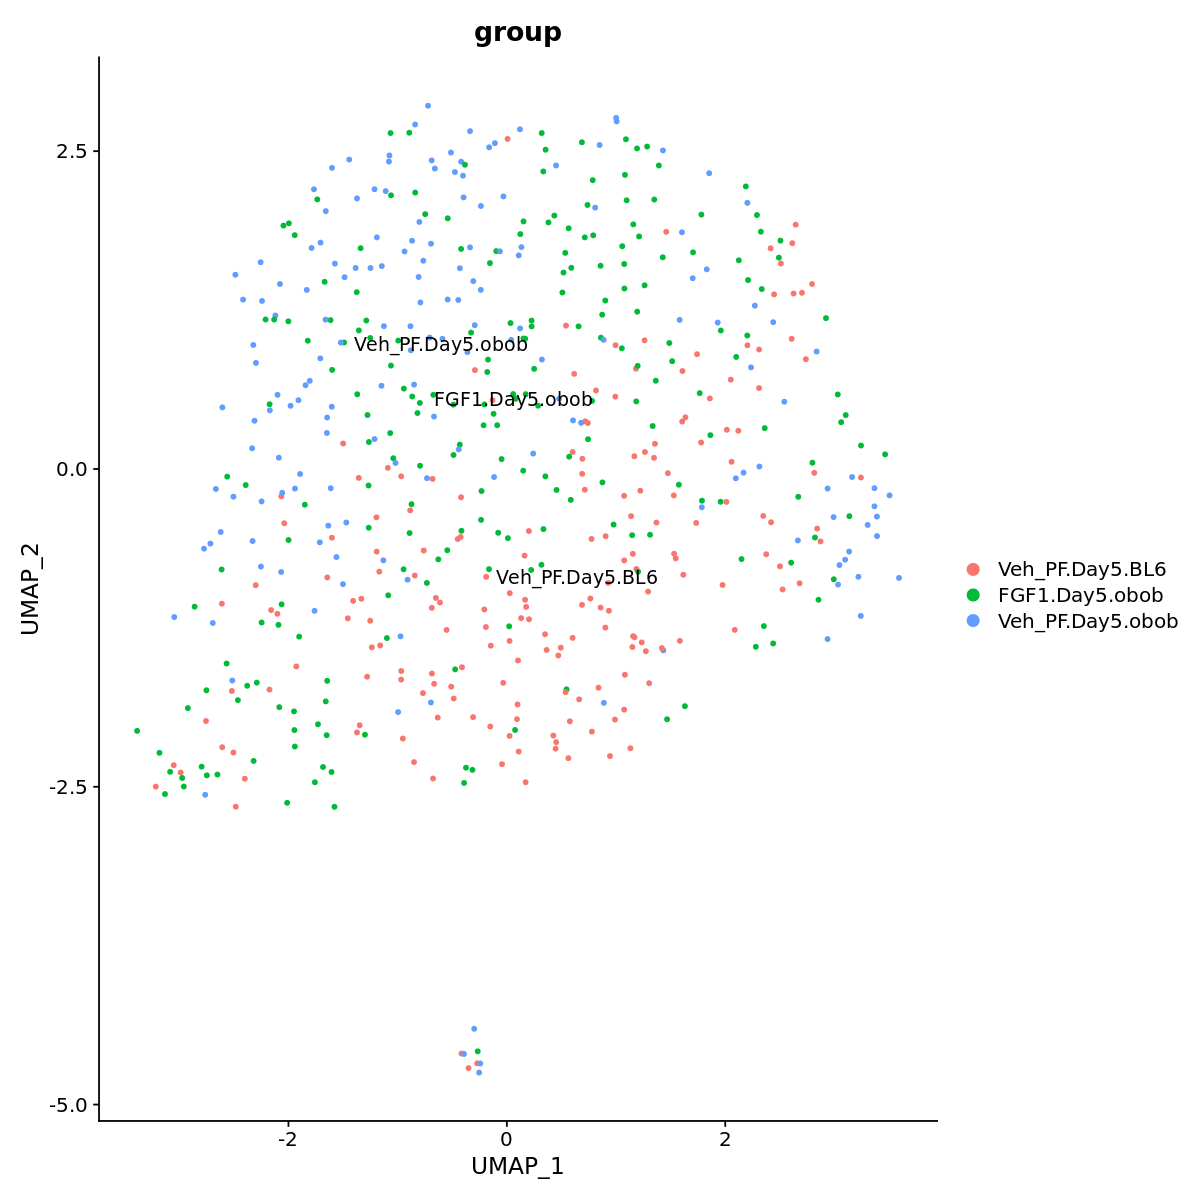

In [202]:
obj_f = obj %>%
subset(subset = group == c("FGF1.Day5.obob", "Veh_PF.Day5.obob", "Veh_PF.Day5.BL6")) %>%
Seurat::SCTransform(assay='RNA',
                        method="glmGamPoi",
                        vars.to.regress="batch",
                        vst.flavor="v2",
                        verbose=TRUE) %>%
run_sct_chaser(resolution=0.8)
DimPlot(obj_f, reduction = "umap", group.by = "group", label = TRUE,  repel = TRUE)


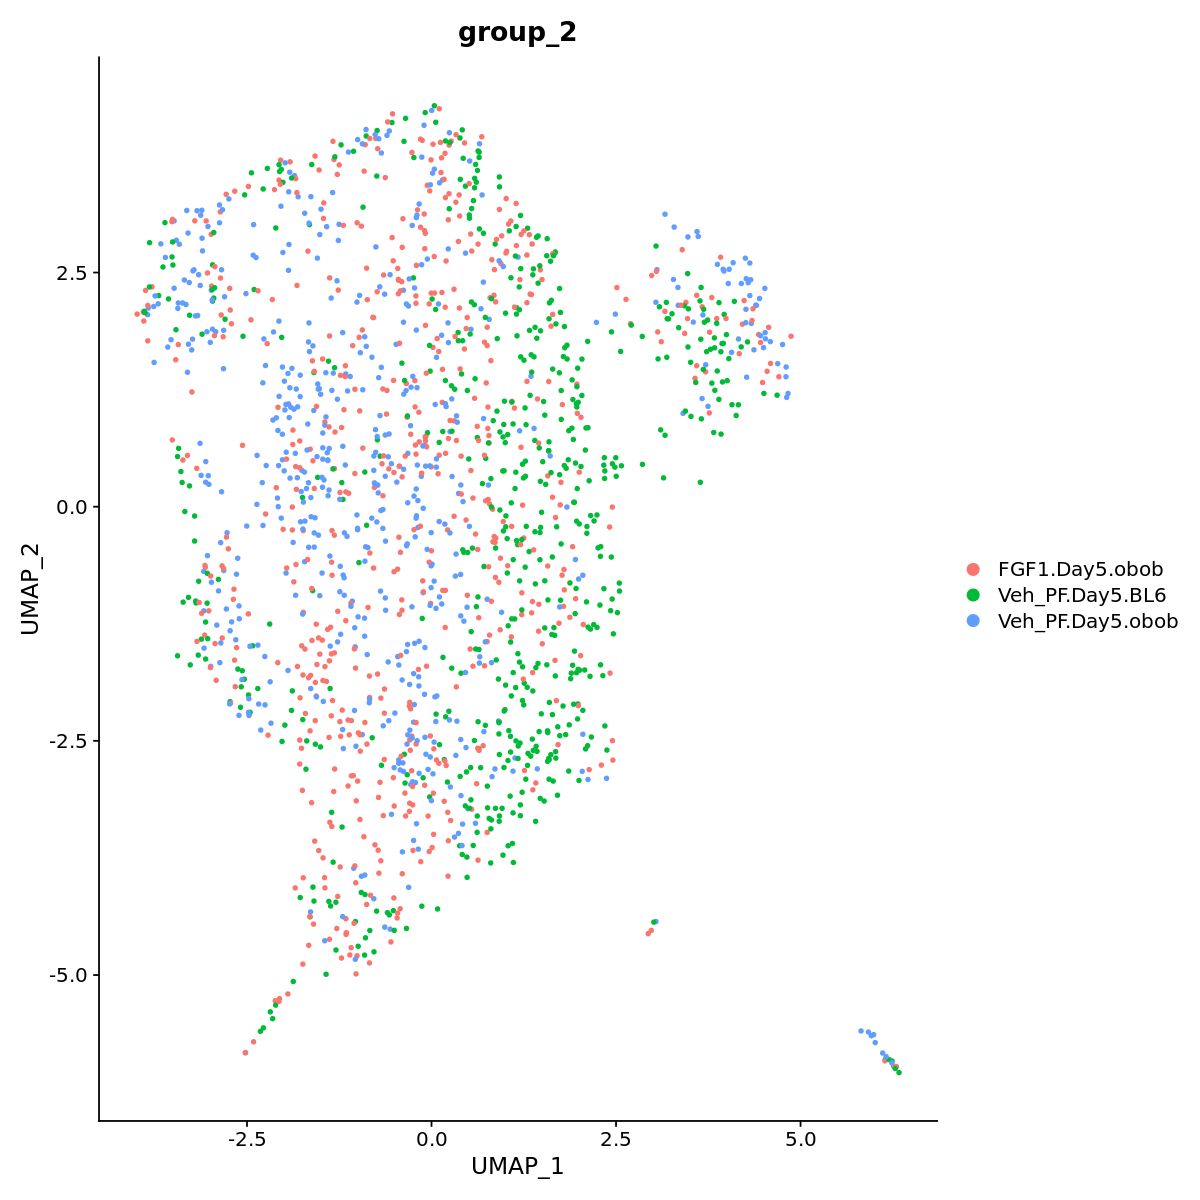

In [207]:
obj@meta.data = obj@meta.data %>%
mutate(group_2 = case_when(group %in% "FGF1.Day5.obob" ~ "FGF1.Day5.obob",
                           group %in% "Veh_PF.Day5.obob" ~ "Veh_PF.Day5.obob",
                           group %in% "Veh_PF.Day5.BL6" ~ "Veh_PF.Day5.BL6",
                        TRUE ~ as.character ('other')))
obj_f = obj %>% subset(subset= group_2 != "other")
DimPlot(obj_f, reduction = "umap", group.by = "group_2", label = FALSE,  repel = TRUE)

In [199]:
obj@meta.data$group %>% unique

[1] FGF1.Day14.obob   Veh_PF.Day5.BL6   Veh_PF.Day5.obob  Veh_PF.Day14.obob Veh_PF.Day14.BL6  FGF1.Day5.obob   
Levels: Veh_PF.Day14.BL6 Veh_PF.Day5.BL6 FGF1.Day14.obob Veh_PF.Day14.obob FGF1.Day5.obob Veh_PF.Day5.obob

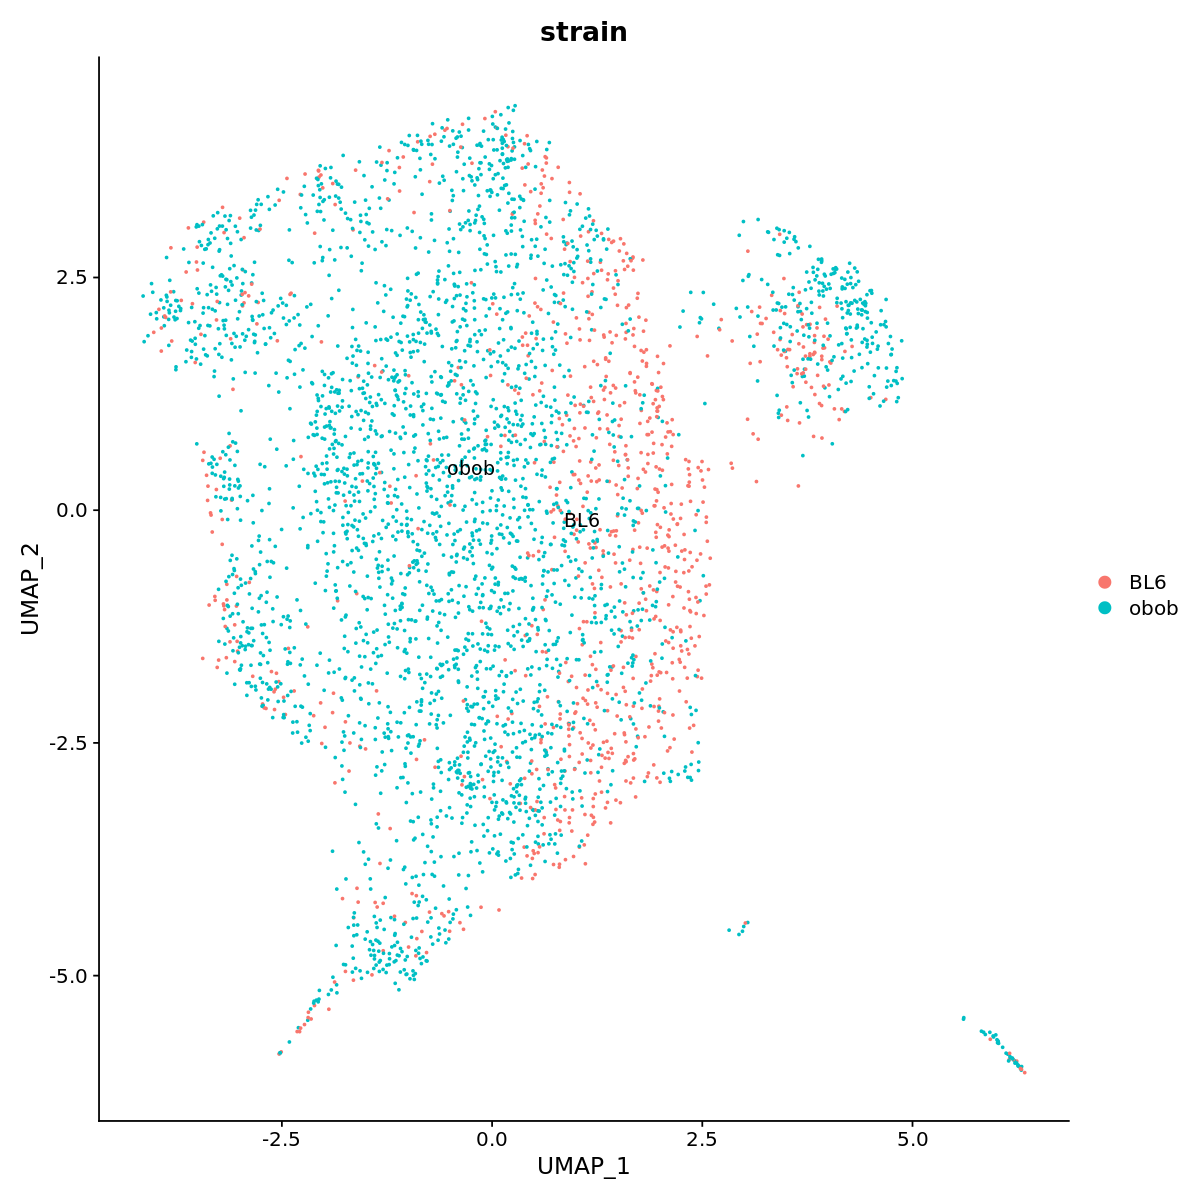

In [193]:
DimPlot(obj, reduction = "umap", group.by = "strain", label = TRUE,  repel = TRUE)

In [191]:
nh_graph_pl <- plotNhoodGraphDA(obob_milo, da_results, layout="UMAP",alpha=0.1, size_range = c(0.5,2)) 

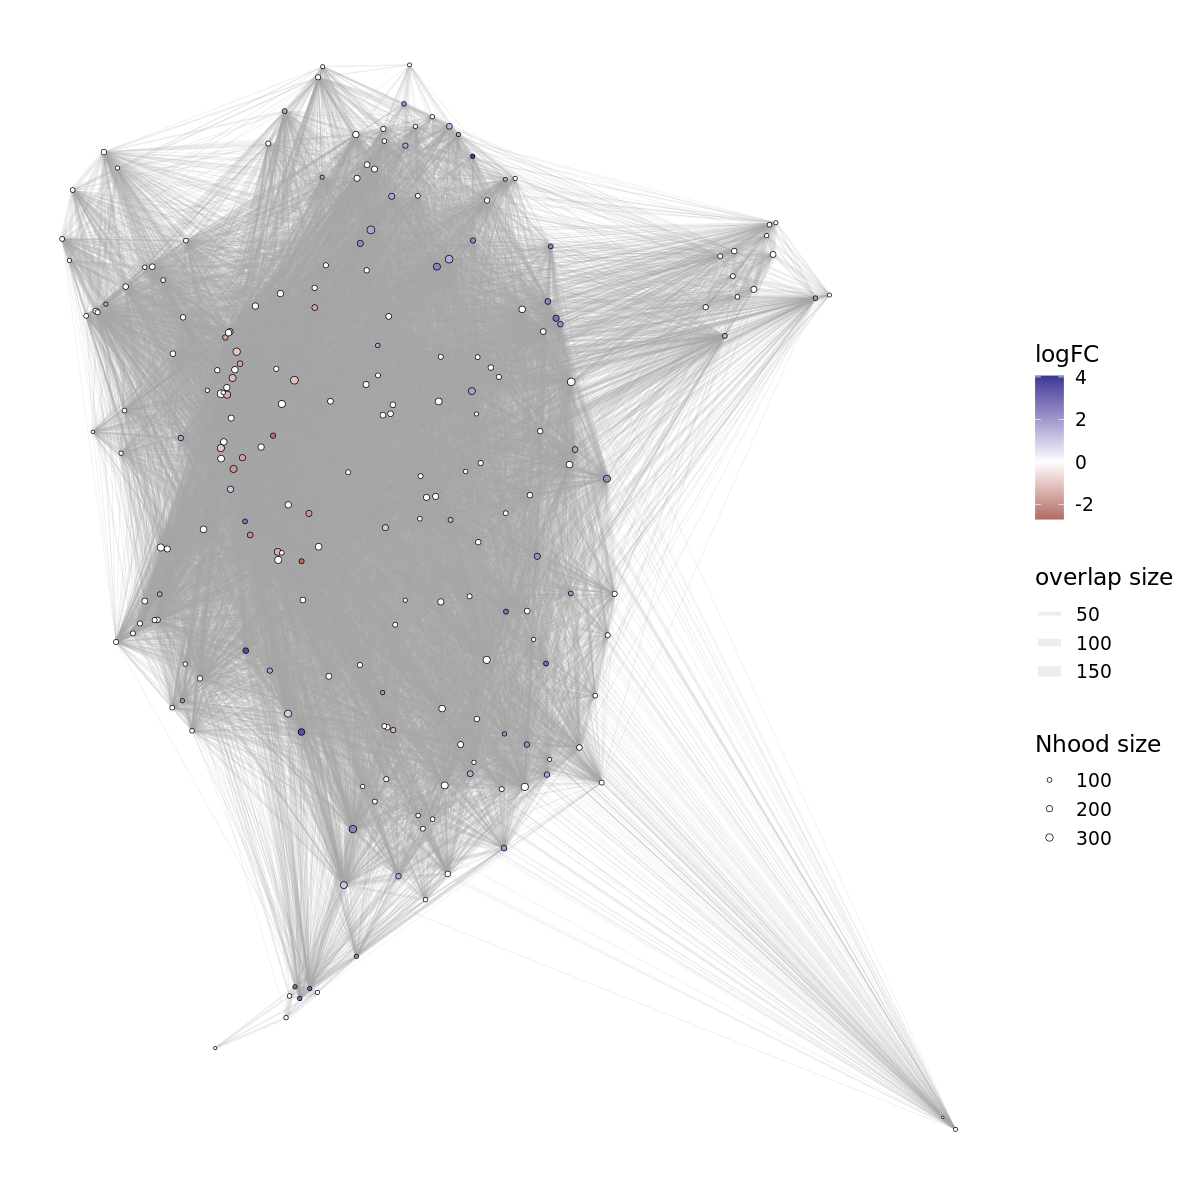

In [192]:
plotNhoodGraphDA(obob_milo, da_results, layout="UMAP",alpha=0.1, size_range = c(0.5,2), ) 

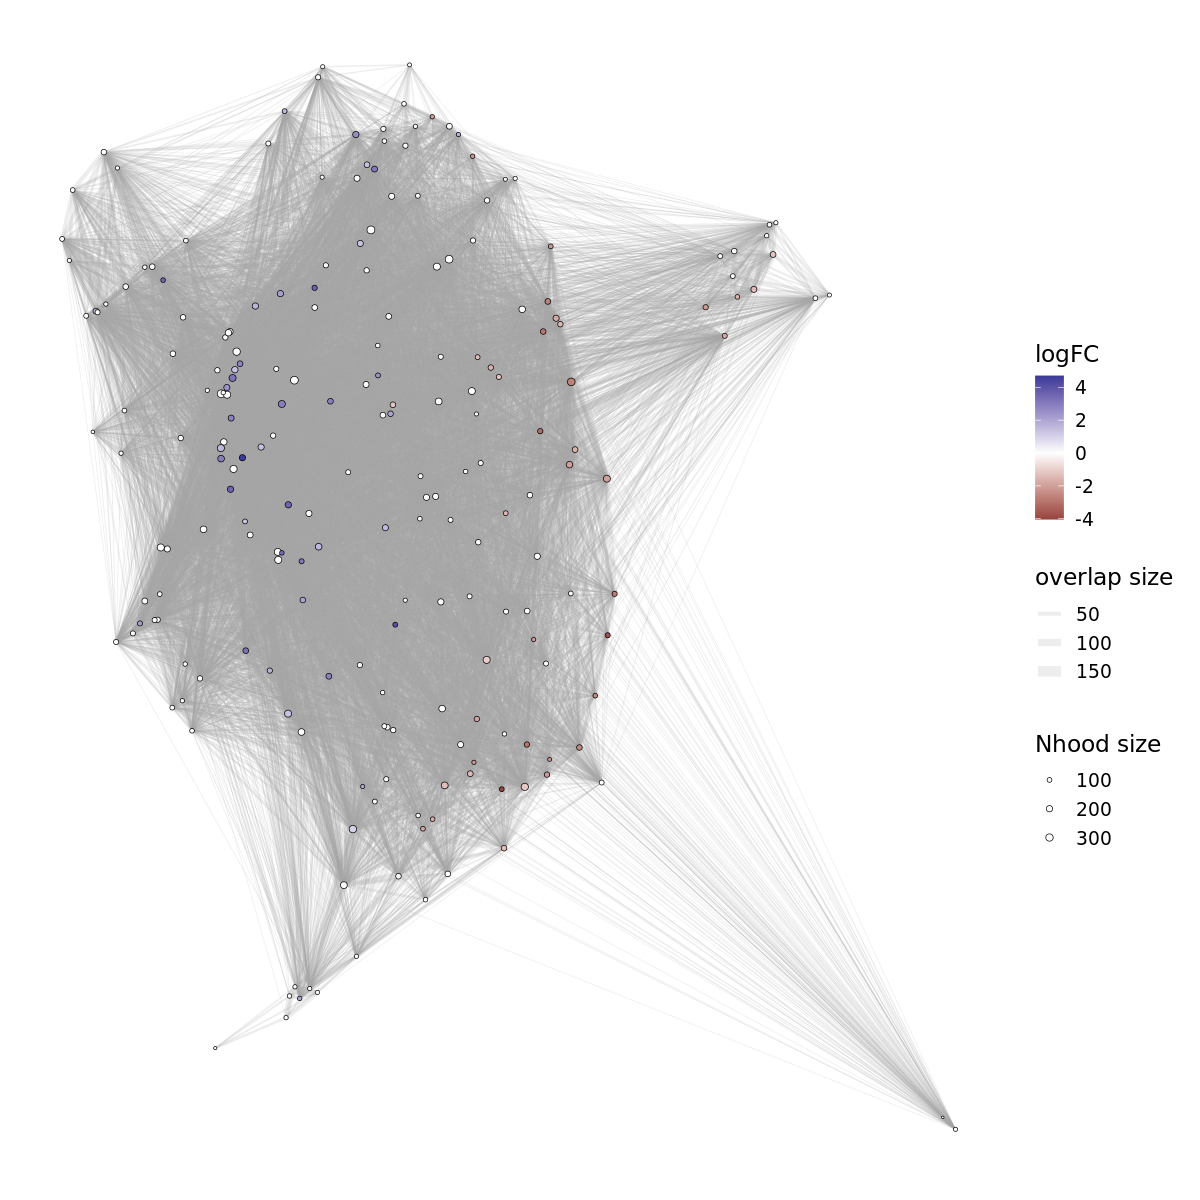

In [168]:
plotNhoodGraphDA(obob_milo, da_results, layout="UMAP",alpha=0.1, size_range = c(0.5,2), ) 

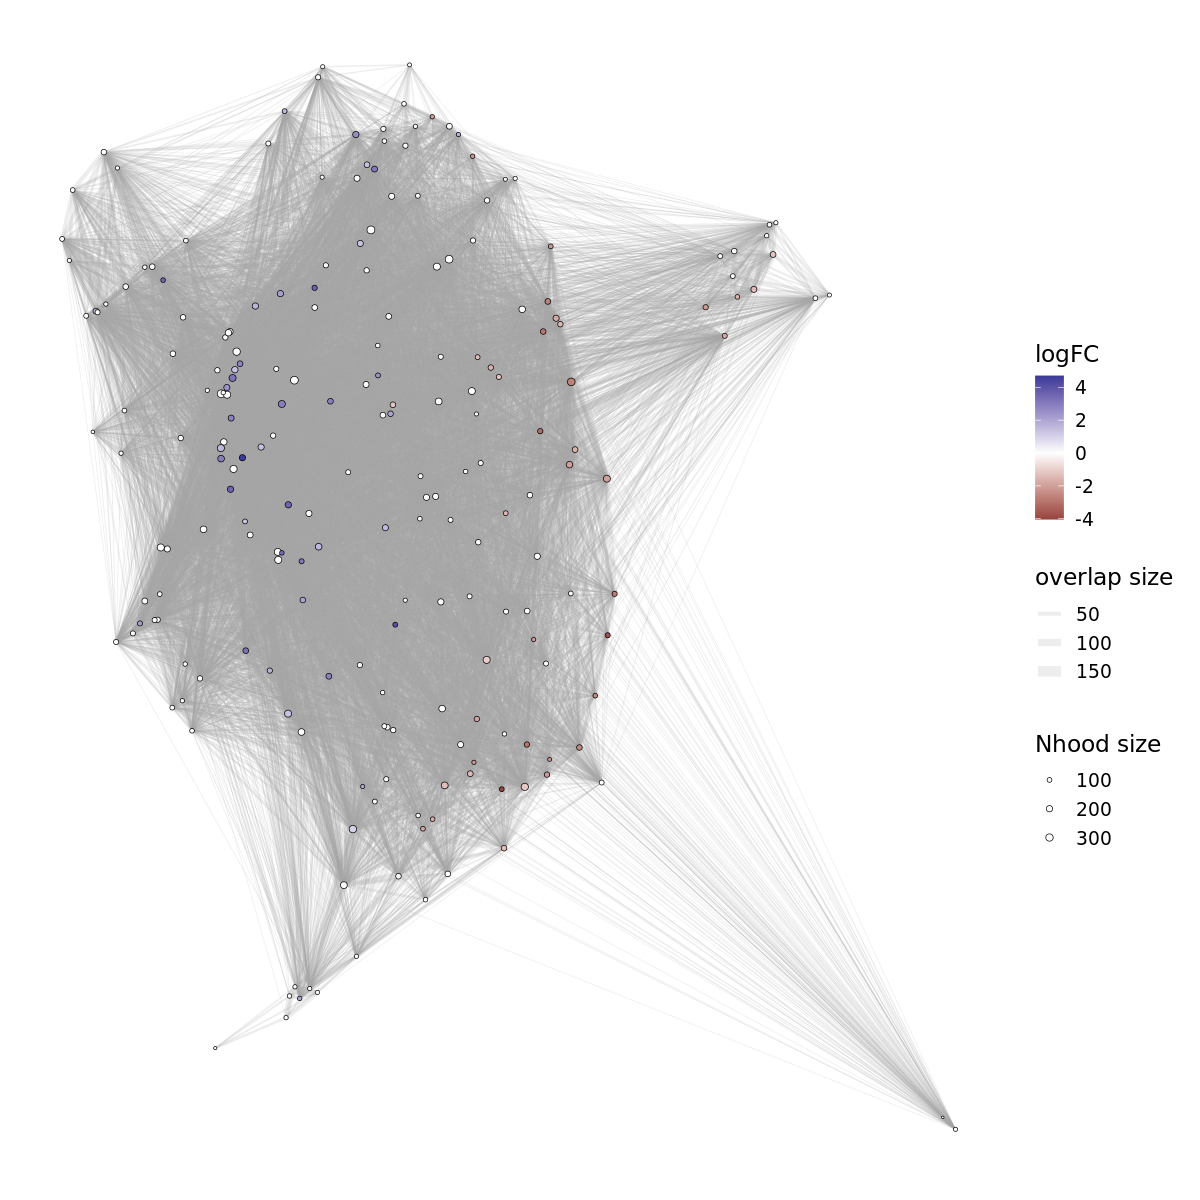

In [169]:
options(repr.plot.width=10, repr.plot.height=10)
plotNhoodGraphDA(obob_milo, da_results, layout="UMAP",alpha=0.1, size_range = c(0.5,2)) 

Warning message:
"ggrepel: 4 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


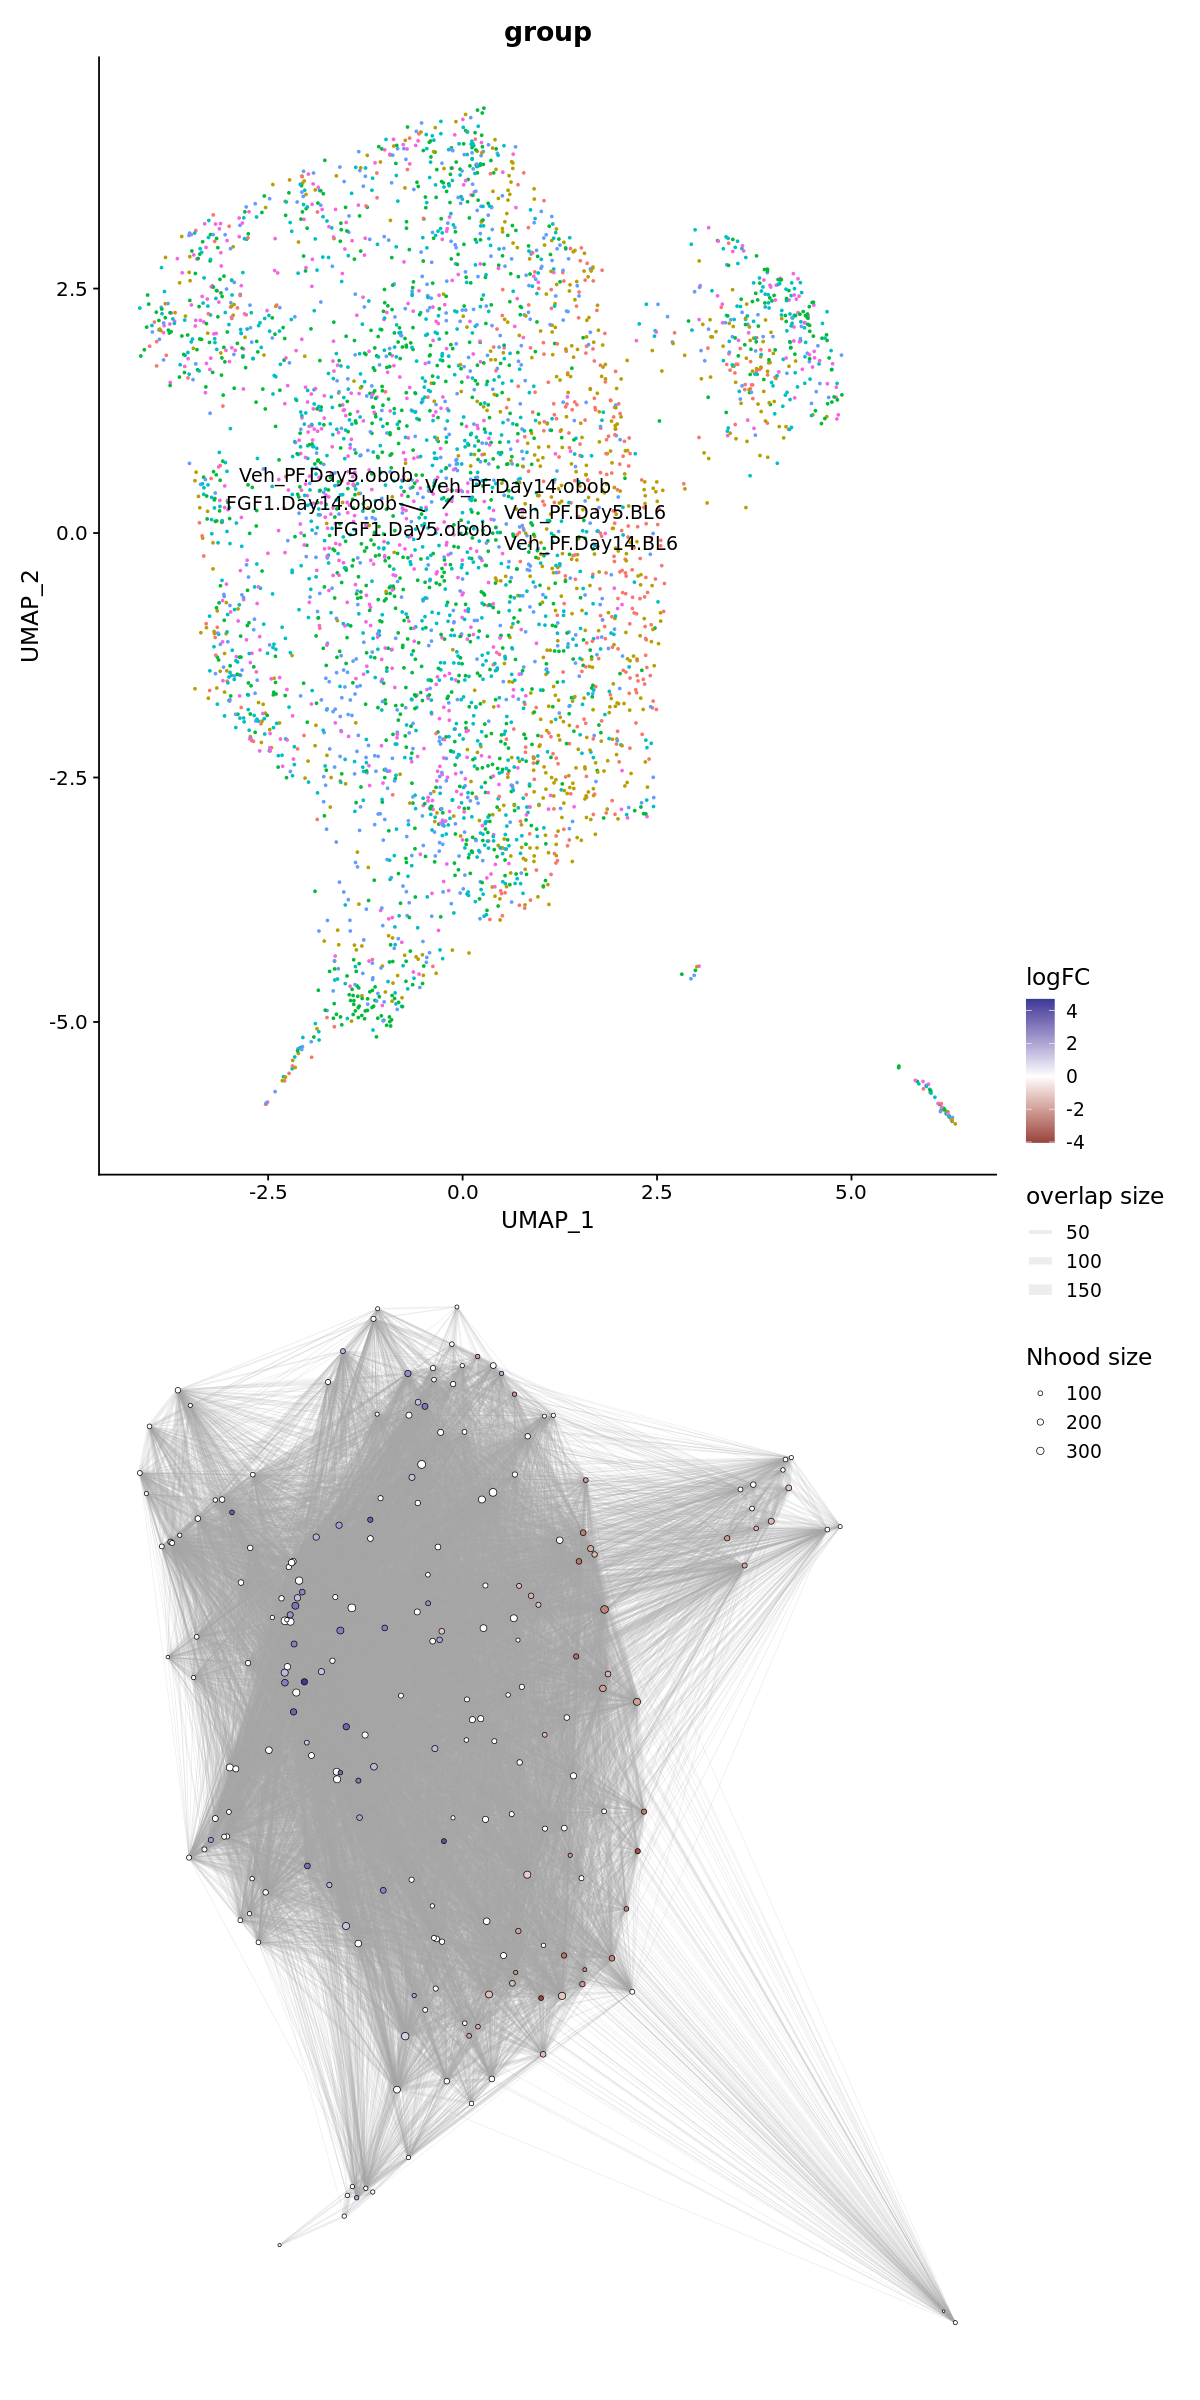

In [170]:
options(repr.plot.width=10, repr.plot.height=20)
umap_plot / nh_graph_pl +
  plot_layout(guides="collect")

In [663]:
da_results <- annotateNhoods(obob_milo, da_results, coldata_col = "labels")
head(da_results)

logFC      logCPM   F          PValue       FDR         Nhood SpatialFDR 
1 -2.0496034 12.92203 13.9183058 0.0001926972 0.002448388 1     0.002290512
2  0.4294923 13.39978  1.0335706 0.3093621854 0.480735482 2     0.478401895
3  0.1639651 12.82383  0.1031473 0.7480960218 0.841608025 3     0.842624211
4 -0.2391018 13.15517  0.2632255 0.6079315518 0.737714692 4     0.737550612
5 -1.3630483 12.25238  2.6789240 0.1017364439 0.242740204 5     0.236243390
6 -0.1404831 12.61608  0.0338763 0.8539763578 0.908578011 6     0.910260452
  NhoodGroup NhoodGroup2 polarity labels labels_fraction
1 1          neg         neg      MOL    1              
2 2          none        none     MOL    1              
3 3          none        none     MOL    1              
4 3          none        none     MOL    1              
5 1          none        none     MOL    1              
6 3          none        none     MOL    1

In [667]:
da_results <- annotateNhoods(obob_milo, da_results, coldata_col = "treatment")
head(da_results)

logFC      logCPM   F          PValue       FDR         Nhood SpatialFDR 
1 -2.0496034 12.92203 13.9183058 0.0001926972 0.002448388 1     0.002290512
2  0.4294923 13.39978  1.0335706 0.3093621854 0.480735482 2     0.478401895
3  0.1639651 12.82383  0.1031473 0.7480960218 0.841608025 3     0.842624211
4 -0.2391018 13.15517  0.2632255 0.6079315518 0.737714692 4     0.737550612
5 -1.3630483 12.25238  2.6789240 0.1017364439 0.242740204 5     0.236243390
6 -0.1404831 12.61608  0.0338763 0.8539763578 0.908578011 6     0.910260452
  NhoodGroup NhoodGroup2 polarity labels labels_fraction treatment
1 1          neg         neg      MOL    1               Veh_PF   
2 2          none        none     MOL    1               FGF1     
3 3          none        none     MOL    1               Veh_PF   
4 3          none        none     MOL    1               Veh_PF   
5 1          none        none     MOL    1               Veh_PF   
6 3          none        none     MOL    1               FGF1     
  treatment_fraction
1 0.7090909         
2 0.5171103         
3 0.5032258         
4 0.6298077         
5 0.5454545         
6 0.5121951

In [669]:
da_results <- annotateNhoods(obob_milo, da_results, coldata_col = c("strain", "time"))
head(da_results)

Warning message in if (!coldata_col %in% names(colData(x))) {:
“the condition has length > 1 and only the first element will be used”


ERROR: Error in normalizeDoubleBracketSubscript(i, x, exact = exact, allow.NA = TRUE, : attempt to extract more than one element


In [672]:
da_results %>% tibble::rownames_to_column(var="rownames")

rownames logFC        logCPM   F            PValue       FDR          Nhood
1   1        -2.04960336  12.92203 13.91830584  1.926972e-04 2.448388e-03  1   
2   2         0.42949232  13.39978  1.03357056  3.093622e-01 4.807355e-01  2   
3   3         0.16396509  12.82383  0.10314732  7.480960e-01 8.416080e-01  3   
4   4        -0.23910178  13.15517  0.26322548  6.079316e-01 7.377147e-01  4   
5   5        -1.36304832  12.25238  2.67892396  1.017364e-01 2.427402e-01  5   
6   6        -0.14048313  12.61608  0.03387630  8.539764e-01 9.085780e-01  6   
7   7         1.14201568  12.55540  2.41839672  1.199705e-01 2.727750e-01  7   
8   8         0.63338507  12.69762  1.50795787  2.194987e-01 3.733207e-01  8   
9   9        -1.40689250  13.42337  9.54943673  2.009289e-03 1.496574e-02  9   
10  10        0.94046676  13.80584  2.59691998  1.071569e-01 2.515857e-01 10   
11  11       -0.30088837  13.25024  0.37793777  5.387321e-01 6.997435e-01 11   
12  12       -1.48401966  13.34123  8.91312909  2.843034e-03 1.860895e-02 12   
13  13       -0.26973588  12.99506  0.22608288  6.344608e-01 7.561366e-01 13   
14  14        2.51111697  13.67178 31.97902223  1.629754e-08 1.173423e-06 14   
15  15       -0.12854282  12.89762  0.05071916  8.218242e-01 8.965355e-01 15   
16  16       -0.68308474  11.87237  0.58002770  4.463312e-01 6.260229e-01 16   
17  17       -2.70309689  12.57098 16.74147303  4.339129e-05 7.209629e-04 17   
18  18       -1.11534835  12.30137  2.34709305  1.255692e-01 2.822406e-01 18   
19  19       -0.90705180  12.53008  2.12184677  1.452633e-01 2.995533e-01 19   
20  20       -1.25892747  13.38586  8.15738195  4.303392e-03 2.628051e-02 20   
21  21        0.57622289  12.20655  0.45111666  5.018308e-01 6.732637e-01 21   
22  22       -0.28911637  13.03778  0.38752819  5.336250e-01 6.997435e-01 22   
23  23       -0.26535099  12.71562  0.14296647  7.053628e-01 8.061290e-01 23   
24  24        0.91474031  12.75258  1.95821230  1.617559e-01 3.205438e-01 24   
25  25        1.64254281  13.75494 11.76804152  6.066351e-04 6.239675e-03 25   
26  26        0.09964466  12.35754  0.02208364  8.818698e-01 9.198022e-01 26   
27  27       -0.22173669  13.24846  0.27869480  5.975773e-01 7.333904e-01 27   
28  28        3.05582430  12.59053 17.15971951  3.483793e-05 6.840903e-04 28   
29  29        0.81966374  12.87656  2.86310934  9.068366e-02 2.352498e-01 29   
30  30       -1.04294485  13.41560  5.19748910  2.265420e-02 7.817234e-02 30   
⋮   ⋮        ⋮            ⋮        ⋮            ⋮            ⋮            ⋮    
187 187      -0.425075530 12.45470 2.905859e-01 5.898652e-01 7.322464e-01 187  
188 188      -0.367283805 13.21313 5.234720e-01 4.693924e-01 6.416942e-01 188  
189 189       1.661636434 13.01425 9.196481e+00 2.435089e-03 1.735352e-02 189  
190 190       0.519175081 13.07838 1.209763e+00 2.714228e-01 4.310832e-01 190  
191 191       0.305727175 13.09308 4.299899e-01 5.120188e-01 6.826918e-01 191  
192 192       0.867873858 12.36217 1.535097e+00 2.153972e-01 3.717202e-01 192  
193 193      -0.788725211 13.10147 2.819900e+00 9.315386e-02 2.367204e-01 193  
194 194      -1.536661111 12.56497 4.565874e+00 3.265504e-02 1.024792e-01 194  
195 195      -0.063745882 12.62160 1.434655e-02 9.046637e-01 9.328219e-01 195  
196 196       1.262803568 12.48764 1.594383e+00 2.067497e-01 3.690739e-01 196  
197 197       0.258365657 12.56602 2.179598e-01 6.406157e-01 7.561366e-01 197  
198 198      -0.004596391 12.89017 3.286315e-06 9.985537e-01 9.985537e-01 198  
199 199       1.137431156 12.41253 1.730244e+00 1.884296e-01 3.570246e-01 199  
200 200      -1.049692178 12.42765 2.799129e+00 9.436722e-02 2.370154e-01 200  
201 201       1.811094511 12.82816 5.193174e+00 2.271757e-02 7.817234e-02 201  
202 202       2.341543691 13.08142 2.313076e+01 1.550164e-06 6.696707e-05 202  
203 203      -0.155318499 12.86668 6.442684e-02 7.996398e-01 8.857549e-01 203  
204 204       1.000468209 12.54158 1.681519e+00 1.947722e-01 3.652199e-01 204  
205 

In [ ]:
#we want to set a threshold to exclude neighbourhoods with a mix of cell types
ggplot(da_results, aes(labels_fraction)) + geom_histogram(bins=50)

In [173]:
da_results$labels <- ifelse(da_results$labels_fraction < 0.7, "Mixed", da_results$labels)

In [174]:
all_nhood = da_results %>%
group_by(labels) %>% 
summarise(n = n()) %>%
arrange(desc(n))

sig_nhood = da_results %>%
mutate(across("labels", as.factor)) %>%
filter(.[['SpatialFDR']] < 0.1) %>%
group_by(labels, .drop=FALSE) %>% 
summarise(n = n()) %>%
arrange(desc(n)) %>%
rename("significant" = "n")


sig_up = da_results %>%
mutate(across("labels", as.factor)) %>%
filter(.[['SpatialFDR']] < 0.1) %>%
filter(.[['logFC']] > 0) %>%
group_by(labels, .drop=FALSE) %>% 
summarise(n = n()) %>%
arrange(desc(n)) %>%
rename("up" = "n") %>%
tidyr::complete()

sig_down = da_results %>%
mutate(across("labels", as.factor)) %>%
filter(.[['SpatialFDR']] < 0.1) %>%
filter(.[['logFC']] < 0) %>%
group_by(labels, .drop=FALSE) %>% 
summarise(n = n()) %>%
arrange(desc(n)) %>%
rename("down" = "n") %>%
tidyr::complete()

nhood_summary = plyr::join_all(list(all_nhood, sig_nhood, sig_up, sig_down), by = 'labels')
nhood_summary = nhood_summary %>% arrange(n)
# nhood_summary = nhood_summary %>% arrange(significant)
nhood_summary$labels = factor(nhood_summary$labels, levels=nhood_summary$labels)
nhood_summary = nhood_summary %>% tidyr::pivot_longer(c("up", "down"), names_to="direction", values_to="n_nhoods")

In [175]:
dput(levels(nhood_summary$labels))

"MOL"


In [176]:
da_results$labels = factor(da_results$labels, levels=levels(nhood_summary$labels))

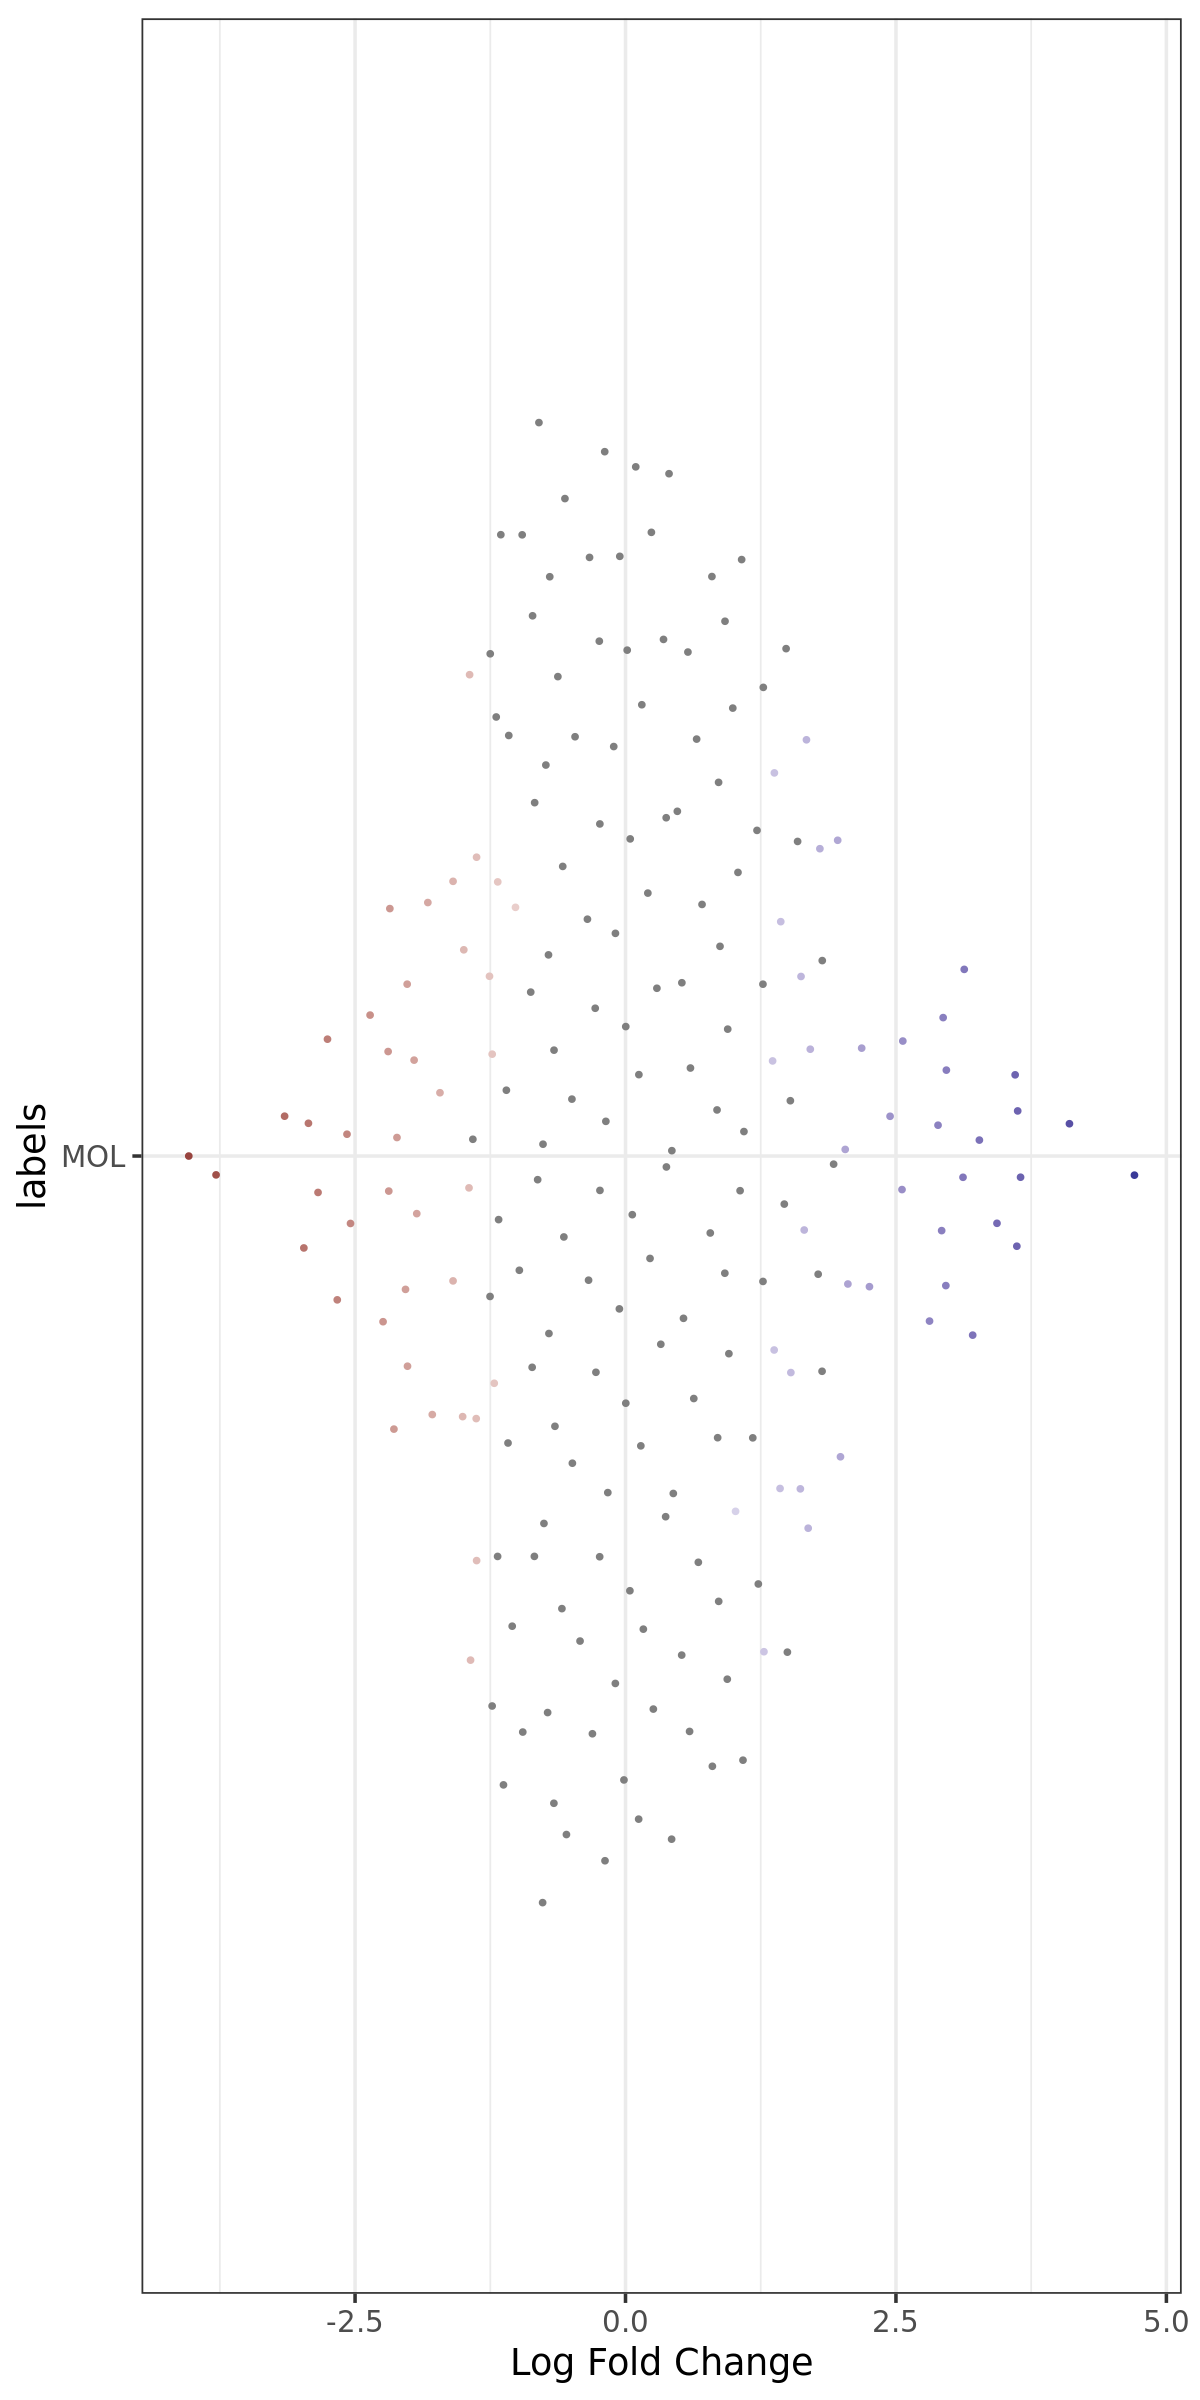

In [177]:
options(repr.plot.width=10, repr.plot.height=20)
pdab = plotDAbeeswarm(da_results, group.by = "labels", )
pdab

In [178]:
## Exclude zero counts genes
keep.rows <- rowSums(logcounts(obob_milo)) != 0
obob_milo <- obob_milo[keep.rows, ]

## Find HVGs
set.seed(101)
dec <- scran::modelGeneVar(obob_milo)
hvgs <- scran::getTopHVGs(dec, n=3000)
head(hvgs)

[1] "Kirrel3" "Grm7"    "Spock1"  "Tenm2"   "Wwox"    "Dcc"

In [167]:
## Find groups
da_results <- groupNhoods(obob_milo, da_results, max.lfc.delta = 0.5)
head(da_results)

Found 70 DA neighbourhoods at FDR 10%



logFC      logCPM   F          PValue       FDR         Nhood SpatialFDR 
1 -2.0496034 12.92203 13.9183058 0.0001926972 0.002448388 1     0.002290512
2  0.4294923 13.39978  1.0335706 0.3093621854 0.480735482 2     0.478401895
3  0.1639651 12.82383  0.1031473 0.7480960218 0.841608025 3     0.842624211
4 -0.2391018 13.15517  0.2632255 0.6079315518 0.737714692 4     0.737550612
5 -1.3630483 12.25238  2.6789240 0.1017364439 0.242740204 5     0.236243390
6 -0.1404831 12.61608  0.0338763 0.8539763578 0.908578011 6     0.910260452
  NhoodGroup
1 1         
2 2         
3 3         
4 3         
5 1         
6 3

Converting group.by to factor...



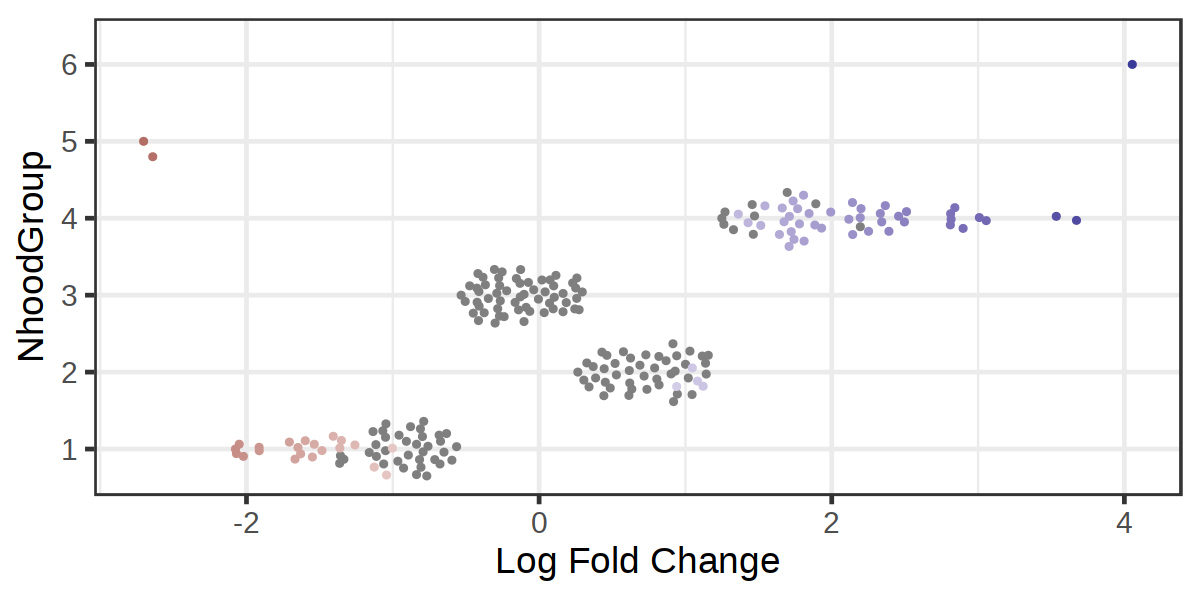

In [169]:
options(repr.plot.width=10, repr.plot.height=5)
pdab = plotDAbeeswarm(da_results, group.by = "NhoodGroup", )
pdab

In [524]:
da_results = da_results %>% 
 mutate(
    polarity = case_when(
      logFC > 0 & SpatialFDR < 0.1 ~ "pos",
      logFC < 0 & SpatialFDR < 0.1 ~ "neg",
      TRUE                      ~ "none"
    )
  )

Converting group.by to factor...



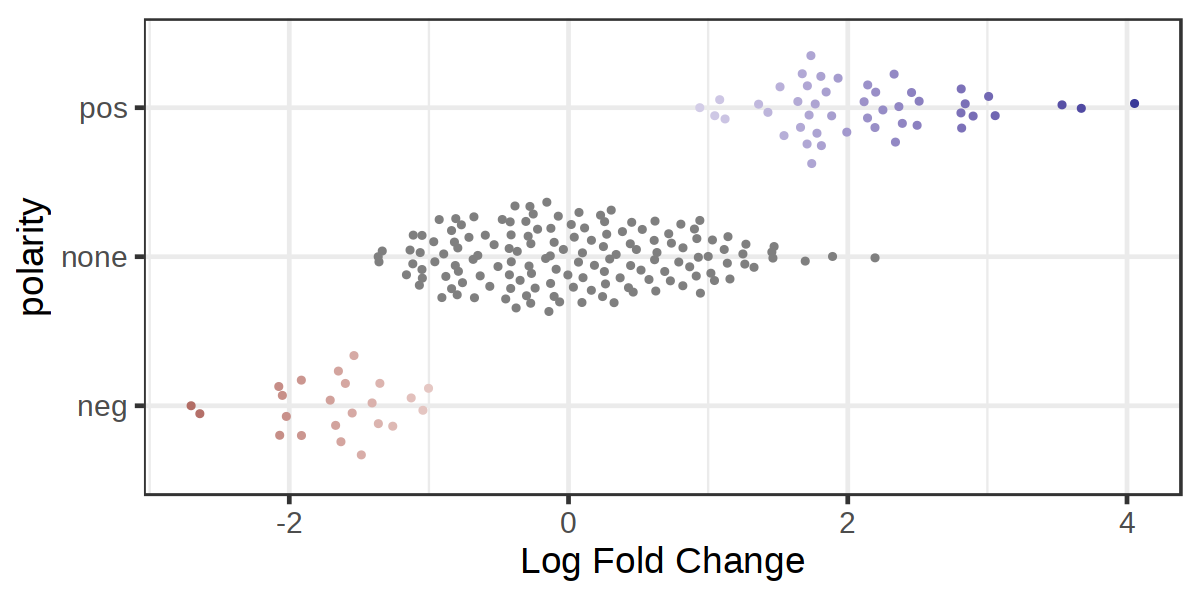

In [525]:
options(repr.plot.width=10, repr.plot.height=5)
pdab = plotDAbeeswarm(da_results, group.by = "polarity", )
pdab

In [526]:
obob_milo

class: Milo 
dim: 17447 4023 
metadata(0):
assays(2): counts logcounts
rownames(17447): Lypla1 Tcea1 ... ENSMUSG00000095742 ENSMUSG00000095041
rowData names(0):
colnames(4023): ATTACTCTCCGCGGAT_1_1 AGTTCGAAGAAACCAT_1_1 ...
  AGGCATTGTCATCGGC_5_3 TGTAGACCAATGAAAC_5_3
colData names(36): orig.ident nCount_RNA ... group ident
reducedDimNames(2): PCA UMAP
mainExpName: SCT
altExpNames(0):
nhoods dimensions(2): 4023 216
nhoodCounts dimensions(2): 216 36
nhoodDistances dimension(1): 216
graph names(1): graph
nhoodIndex names(1): 216
nhoodExpression dimension(2): 1 1
nhoodReducedDim names(0):
nhoodGraph names(0):
nhoodAdjacency dimension(2): 1 1

In [527]:
dgc = obob_milo@nhoods

In [528]:
get_nhood_barcodes = function(dgc, nhood){
    barcodes = names(which(dgc[, nhood] == 1))
    barcodes
}
#supersede with nonresponder

In [529]:
dim(dgc)

[1] 4023  216

In [530]:
# pos_ranks = dgc[, pos_hoods] %>% rowSums %>% rank %>% data.frame()
pos_ranks = dgc[, pos_hoods] %>% rowSums %>% data.frame()
colnames(pos_ranks) = 'rank'
# pos_ranks %>% top_n(round((dim(pos_ranks)[1])/2))

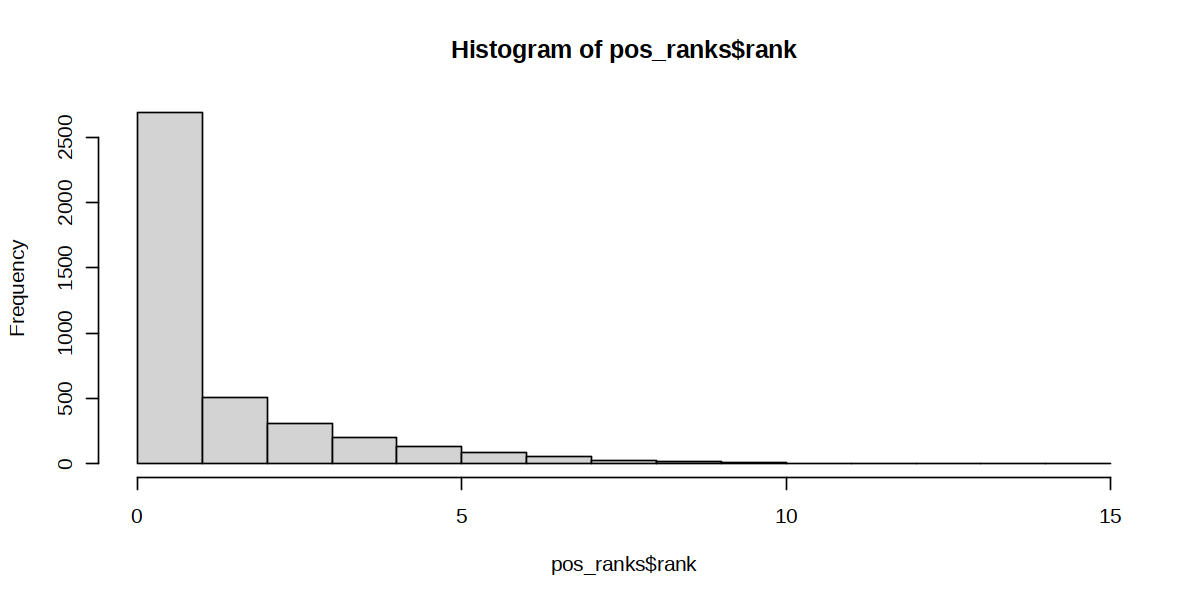

In [531]:
hist(pos_ranks$rank)

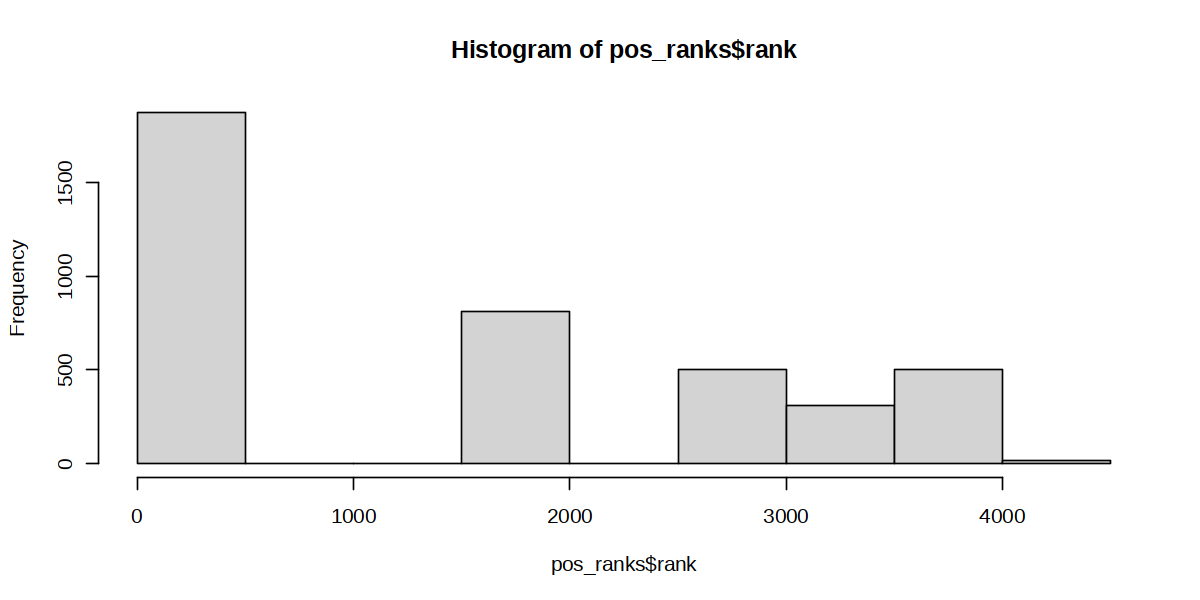

In [532]:
pos_ranks = dgc[, pos_hoods] %>% rowSums %>% rank(ties='min') %>% data.frame()
colnames(pos_ranks) = 'rank'
# pos_ranks %>% top_n(round((dim(pos_ranks)[1])/2))
hist(pos_ranks$rank)

In [548]:
get_polar_cells = function(milo, da_results, direction, pct){
    dgc = milo@nhoods
    polar_hoods = da_results %>% filter(polarity == direction) %>% pull(Nhood)
    ranks_df = dgc[, polar_hoods] %>% rowSums %>% rank(ties='average') %>% data.frame()
    colnames(ranks_df) = 'rank'
    how_many = round(dim(ranks_df)[1]*pct)
    barcodes = ranks_df %>% arrange(desc(rank)) %>% top_n(how_many, rank) %>% rownames
    barcodes
}

assign_cell_polarity = function(milo, da_results, pct=0.1){
    pos_cells = get_polar_cells(milo, da_results, "pos", pct)
    neg_cells = get_polar_cells(milo, da_results, "neg", pct)
    none_cells = rownames(milo@nhoods)
    pos_cells = setdiff(pos_cells, neg_cells)
    neg_cells = setdiff(neg_cells, pos_cells)
    none_cells = setdiff(none_cells, union(pos_cells, neg_cells))
    pos_tib = tibble(barcode = pos_cells, polarity='pos')
    neg_tib = tibble(barcode = neg_cells, polarity='neg')
    none_tib = tibble(barcode = none_cells, polarity='none')
    all_tib = rbind(pos_tib, neg_tib, none_tib)
    polarity_df = data.frame(all_tib)
    rownames(polarity_df) = polarity_df$barcode
    polarity_df
}

In [549]:
assign_cell_polarity(obob_milo, da_results, pct=0.10) %>% group_by(polarity, .drop=FALSE) %>% 
summarise(n = n())

polarity n   
1 neg       578
2 none     2993
3 pos       452

In [ ]:
pollarit

In [622]:
polarity_df = assign_cell_polarity(obob_milo, da_results, pct=0.10)
head(polarity_df)

barcode              polarity
TTTGGAGAGCCGTTAT_5_1 TTTGGAGAGCCGTTAT_5_1 pos     
GGGCCATCATCCTGTC_5_1 GGGCCATCATCCTGTC_5_1 pos     
TCATGTTGTAGATTAG_4_1 TCATGTTGTAGATTAG_4_1 pos     
CTGAATGCAGAACCGA_5_1 CTGAATGCAGAACCGA_5_1 pos     
ATTCTTGGTTAAGGGC_1_2 ATTCTTGGTTAAGGGC_1_2 pos     
CAGCACGCAGTTTCAG_1_3 CAGCACGCAGTTTCAG_1_3 pos

In [551]:
barcodes = polarity %>% filter(polarity == 'pos') %>% pull(barcode)

In [552]:
# options(repr.plot.width=10, repr.plot.height=10)
# barcodes = polarity %>% filter(polarity == 'none') %>% pull(barcode)
# DimPlot(obj, cells.highlight = barcodes)

In [572]:
rm(polarity)

In [657]:
labels_df = obob_milo %>% colData %>% data.frame %>% select(labels)
labels_df = merge(polarity_df, labels_df, by=0) %>%
  tibble::column_to_rownames("Row.names") %>%
  mutate(polar_label = paste0(labels, '.', polarity)) %>%
  select(-c(labels, polarity)) %>%
  mutate(barcode =  factor(barcode, levels = rownames(colData(obob_milo)))) %>%
  arrange(barcode) %>%
  select(-barcode)
head(labels_df)


polar_label
ATTACTCTCCGCGGAT_1_1 MOL.none   
AGTTCGAAGAAACCAT_1_1 MOL.none   
CACGGGTGTTACACTG_1_1 MOL.none   
GCCAACGGTTGTTTGG_1_1 MOL.none   
CGAAGGAAGCACGATG_1_1 MOL.none   
GTAACACCATATGGCT_1_1 MOL.none

In [655]:
labels_df = labels_df %>%
  mutate(barcode =  factor(barcode, levels = rownames(colData(obob_milo)))) %>%
  arrange(barcode)

In [659]:
make_polar_labels_df = function(obob_milo, polarity_df){
    labels_df = obob_milo %>% colData %>% data.frame %>% select(labels)
    labels_df = merge(polarity_df, labels_df, by=0) %>%
      tibble::column_to_rownames("Row.names") %>%
      mutate(polar_label = paste0(labels, '.', polarity)) %>%
      select(-c(labels, polarity)) %>%
      mutate(barcode =  factor(barcode, levels = rownames(colData(obob_milo)))) %>%
      arrange(barcode) %>%
      select(-barcode)
    labels_df
}

In [661]:
polarity_df

barcode              polarity
TTTGGAGAGCCGTTAT_5_1 TTTGGAGAGCCGTTAT_5_1 pos     
GGGCCATCATCCTGTC_5_1 GGGCCATCATCCTGTC_5_1 pos     
TCATGTTGTAGATTAG_4_1 TCATGTTGTAGATTAG_4_1 pos     
CTGAATGCAGAACCGA_5_1 CTGAATGCAGAACCGA_5_1 pos     
ATTCTTGGTTAAGGGC_1_2 ATTCTTGGTTAAGGGC_1_2 pos     
CAGCACGCAGTTTCAG_1_3 CAGCACGCAGTTTCAG_1_3 pos     
CTTCCGAAGTAGGGTC_3_3 CTTCCGAAGTAGGGTC_3_3 pos     
GCGTTTCGTTGGGTTT_4_2 GCGTTTCGTTGGGTTT_4_2 pos     
CAGTTCCCAAATTGCC_3_3 CAGTTCCCAAATTGCC_3_3 pos     
GATCAGTGTTTAGTCG_3_3 GATCAGTGTTTAGTCG_3_3 pos     
GGGACAACAGACGATG_5_1 GGGACAACAGACGATG_5_1 pos     
GGATCTAGTTACGTAC_3_2 GGATCTAGTTACGTAC_3_2 pos     
TCTTCCTGTGTAACGG_5_2 TCTTCCTGTGTAACGG_5_2 pos     
AGGACGAAGTCTCTGA_4_3 AGGACGAAGTCTCTGA_4_3 pos     
TGGAACTGTGTTATCG_1_1 TGGAACTGTGTTATCG_1_1 pos     
ATAGAGATCTGATGGT_1_1 ATAGAGATCTGATGGT_1_1 pos     
TAAGCACCAGACGCTC_4_1 TAAGCACCAGACGCTC_4_1 pos     
GCTTTCGCAGCGGTCT_5_1 GCTTTCGCAGCGGTCT_5_1 pos     
TCGTGCTGTACTGGGA_5_1 TCGTGCTGTACTGGGA_5_1 pos     
AGACAGGAGTTGTCGT_3_2 AGACAGGAGTTGTCGT_3_2 pos     
TTTCCTCCAGTCTCTC_1_3 TTTCCTCCAGTCTCTC_1_3 pos     
AGGACGACAAAGGTTA_4_3 AGGACGACAAAGGTTA_4_3 pos     
TGATTTCAGAACGCGT_4_1 TGATTTCAGAACGCGT_4_1 pos     
GGTGAAGGTGAGCTCC_4_1 GGTGAAGGTGAGCTCC_4_1 pos     
AGTACTGAGACGGTTG_5_1 AGTACTGAGACGGTTG_5_1 pos     
AGAAGTACAACGCCCA_5_1 AGAAGTACAACGCCCA_5_1 pos     
GGAGGATAGGCCTAGA_5_1 GGAGGATAGGCCTAGA_5_1 pos     
AGCCAATGTAACATAG_1_2 AGCCAATGTAACATAG_1_2 pos     
GTCAGCGCAGGTGACA_2_2 GTCAGCGCAGGTGACA_2_2 pos     
CAATGACGTGACTAAA_5_2 CAATGACGTGACTAAA_5_2 pos     
⋮                    ⋮                    ⋮       
CAGGCCACAAGCGAAC_5_3 CAGGCCACAAGCGAAC_5_3 none    
TTGGGCGCAGTAGGAC_5_3 TTGGGCGCAGTAGGAC_5_3 none    
TTACCGCCAGCTAACT_5_3 TTACCGCCAGCTAACT_5_3 none    
CTACGGGAGAGATGCC_5_3 CTACGGGAGAGATGCC_5_3 none    
GCCGATGTCGTTAGTG_5_3 GCCGATGTCGTTAGTG_5_3 none    
AGATCCATCCATACAG_5_3 AGATCCATCCATACAG_5_3 none    
GCAACCGTCAGTGTCA_5_3 GCAACCGTCAGTGTCA_5_3 none    
GTTAGACCATGTACGT_5_3 GTTAGACCATGTACGT_5_3 none    
CCGATGGGTATCCTCC_5_3 CCGATGGGTATCCTCC_5_3 none    
TGTCAGACAGATGCGA_5_3 TGTCAGACAGATGCGA_5_3 none    
CATCGCTTCGCTGTTC_5_3 CATCGCTTCGCTGTTC_5_3 none    
CTGGCAGAGTTGCCTA_5_3 CTGGCAGAGTTGCCTA_5_3 none    
GCCGTGACACCATTCC_5_3 GCCGTGACACCATTCC_5_3 none    
CCTCACAGTACTCGTA_5_3 CCTCACAGTACTCGTA_5_3 none    
CGGAGAAAGGAGGTTC_5_3 CGGAGAAAGGAGGTTC_5_3 none    
GCAGCTGGTGACAACG_5_3 GCAGCTGGTGACAACG_5_3 none    
GTTCATTTCTCTTCAA_5_3 GTTCATTTCTCTTCAA_5_3 none    
TGTAACGGTGCACAAG_5_3 TGTAACGGTGCACAAG_5_3 none    
AGACAGGTCCACATAG_5_3 AGACAGGTCCACATAG_5_3 none    
ACTTTCAGTTCGTAAC_5_3 ACTTTCAGTTCGTAAC_5_3 none    
AGGATAACAGCAGATG_5_3 AGGATAACAGCAGATG_5_3 none    
GTAGCTAGTCAGCGTC_5_3 GTAGCTAGTCAGCGTC_5_3 none    
CTCCCTCTCACTCGAA_5_3 CTCCCTCTCACTCGAA_5_3 none    
TCGACCTCAACTGAAA_5_3 TCGACCTCAACTGAAA_5_3 none    
ATGCCTCCATTGACTG_5_3 ATGCCTCCATTGACTG_5_3 none    
TCTCAGCGTGGATCGA_5_3 TCTCAGCGTGGATCGA_5_3 none    
AGGACTTGTGGATCGA_5_3 AGGACTTGTGGATCGA_5_3 none    
CGTTAGACATTCTTCA_5_3 CGTTAGACATTCTTCA_5_3 none    
AGGCATTGTCATCGGC_5_3 AGGCATTGTCATCGGC_5_3 none    
TGTAGACCAATGAAAC_5_3 TGTAGACCAATGAAAC_5_3 none

In [660]:
make_polar_labels_df(obob_milo, polarity_df)

polar_label
ATTACTCTCCGCGGAT_1_1 MOL.none   
AGTTCGAAGAAACCAT_1_1 MOL.none   
CACGGGTGTTACACTG_1_1 MOL.none   
GCCAACGGTTGTTTGG_1_1 MOL.none   
CGAAGGAAGCACGATG_1_1 MOL.none   
GTAACACCATATGGCT_1_1 MOL.none   
CCCTTAGCACCGGTCA_1_1 MOL.none   
AGCCACGGTATCCCAA_1_1 MOL.none   
GGGTGTCAGACCATGG_1_1 MOL.none   
ACTGATGCATTGGATC_1_1 MOL.none   
GCATGATTCTTCACAT_1_1 MOL.none   
TTTGGTTGTGCAGTGA_1_1 MOL.none   
CCGGGTAGTTACCCAA_1_1 MOL.none   
CCGCAAGGTCAACACT_1_1 MOL.none   
ACCACAACAAGTACCT_1_1 MOL.none   
ACGTAGTTCACTCCGT_1_1 MOL.pos    
AGTACTGCAGTGACCC_1_1 MOL.none   
CATAGACTCCACTGAA_1_1 MOL.none   
CGAGTTACAATACCTG_1_1 MOL.pos    
AGTCACACACGACGAA_1_1 MOL.none   
ACTTCGCGTGTTTACG_1_1 MOL.none   
TGCTGAATCAGTGTTG_1_1 MOL.none   
CTGCGAGCATTGAAAG_1_1 MOL.none   
GACTCAACAGGAGGAG_1_1 MOL.none   
CCGAACGTCGCAGTTA_1_1 MOL.pos    
GAAACCTTCAATGTCG_1_1 MOL.none   
TACATTCAGCTATCCA_1_1 MOL.none   
CTCCCAATCCTGTAAG_1_1 MOL.none   
CGGAATTCACGCTGTG_1_1 MOL.none   
ACGGTTATCGCCAGAC_1_1 MOL.none   
⋮                    ⋮          
CATCGCTTCGCTGTTC_5_3 MOL.none   
CTGGCAGAGTTGCCTA_5_3 MOL.none   
GCCGTGACACCATTCC_5_3 MOL.none   
AGCTCAATCTTGGTGA_5_3 MOL.neg    
TTTCATGCAGGCATTT_5_3 MOL.neg    
CCTCACAGTACTCGTA_5_3 MOL.none   
CGGAGAAAGGAGGTTC_5_3 MOL.none   
GGAGCAAAGTTCATGC_5_3 MOL.pos    
GCAGCTGGTGACAACG_5_3 MOL.none   
GTTCATTTCTCTTCAA_5_3 MOL.none   
TGTAACGGTGCACAAG_5_3 MOL.none   
AGACAGGTCCACATAG_5_3 MOL.none   
AGGTTACAGGAAGTAG_5_3 MOL.neg    
ACTTTCAGTTCGTAAC_5_3 MOL.none   
AGGATAACAGCAGATG_5_3 MOL.none   
CTCATGCAGACCTTTG_5_3 MOL.pos    
GTAGCTAGTCAGCGTC_5_3 MOL.none   
CTCCCTCTCACTCGAA_5_3 MOL.none   
AGCTTCCCAAGTCCAT_5_3 MOL.neg    
TCGACCTCAACTGAAA_5_3 MOL.none   
ATGCCTCCATTGACTG_5_3 MOL.none   
GATCACACATTGACAC_5_3 MOL.neg    
AGGAATATCCACTGAA_5_3 MOL.pos    
TCTCAGCGTGGATCGA_5_3 MOL.none   
AGGACTTGTGGATCGA_5_3 MOL.none   
CATGCCTTCCAAGGGA_5_3 MOL.neg    
CGTTGGGCACTCCCTA_5_3 MOL.pos    
CGTTAGACATTCTTCA_5_3 MOL.none   
AGGCATTGTCATCGGC_5_3 MOL.none   
TGTAGACCAATGAAAC_5_3 MOL.none

In [610]:
head(polarity_df)

barcode              polarity
TTTGGAGAGCCGTTAT_5_1 TTTGGAGAGCCGTTAT_5_1 pos     
GGGCCATCATCCTGTC_5_1 GGGCCATCATCCTGTC_5_1 pos     
TCATGTTGTAGATTAG_4_1 TCATGTTGTAGATTAG_4_1 pos     
CTGAATGCAGAACCGA_5_1 CTGAATGCAGAACCGA_5_1 pos     
ATTCTTGGTTAAGGGC_1_2 ATTCTTGGTTAAGGGC_1_2 pos     
CAGCACGCAGTTTCAG_1_3 CAGCACGCAGTTTCAG_1_3 pos

In [611]:
merge(head(polarity_df), head(labels_df), by=0)

Row.names barcode polarity labels

In [178]:
da_summary = da_results %>%
mutate(across("NhoodGroup", as.factor)) %>%
# filter(.[['SpatialFDR']] < 0.1) %>%
group_by(NhoodGroup, .drop=FALSE) %>% 
summarise(n = n())

da_summary$avg_lfc = da_summary$avg_lfc = da_results %>%
mutate(across("NhoodGroup", as.factor)) %>%
# filter(.[['SpatialFDR']] < 0.1) %>%
group_by(NhoodGroup, .drop=FALSE) %>% 
summarise(avg_lfc = mean(logFC)) %>%
pull(avg_lfc)

da_summary$pct_avgn = da_summary$n/sum(da_summary$n)
da_summary$merge = da_summary$pct_avgn < 0.1*mean(da_summary$pct_avgn)

# da_summary$rank = (da_summary$avg_lfc)

da_summary

NhoodGroup n  avg_lfc    pct_avgn    merge
1 1          57 -1.1579889 0.263888889 FALSE
2 2          47  0.7405379 0.217592593 FALSE
3 3          57 -0.1272794 0.263888889 FALSE
4 4          52  2.0565794 0.240740741 FALSE
5 5           2 -2.6718489 0.009259259  TRUE
6 6           1  4.0541164 0.004629630  TRUE

In [171]:

da_summary

NhoodGroup n  avg_lfc    pct_avgn    merge
1 1          57 -1.1579889 0.263888889 FALSE
2 2          47  0.7405379 0.217592593 FALSE
3 3          57 -0.1272794 0.263888889 FALSE
4 4          52  2.0565794 0.240740741 FALSE
5 5           2 -2.6718489 0.009259259  TRUE
6 6           1  4.0541164 0.004629630  TRUE

In [174]:
which.min.dist <- function(x){
    dmat <- as.matrix(dist(x))
    diag(dmat) <- Inf
    out <- apply(dmat, 1, which.min)
    return(out)
}

da_summary = da_summary %>% mutate(mindist = which.min.dist(avg_lfc))
da_summary

NhoodGroup n  avg_lfc    pct_avgn    merge mindist
1 1          57 -1.1579889 0.263888889 FALSE 3      
2 2          47  0.7405379 0.217592593 FALSE 3      
3 3          57 -0.1272794 0.263888889 FALSE 2      
4 4          52  2.0565794 0.240740741 FALSE 2      
5 5           2 -2.6718489 0.009259259  TRUE 1      
6 6           1  4.0541164 0.004629630  TRUE 4

In [173]:
da_summary %>% mutate(mindist = which.min.dist(avg_lfc))

NhoodGroup n  avg_lfc    pct_avgn    merge mindist
1 1          57 -1.1579889 0.263888889 FALSE 3      
2 2          47  0.7405379 0.217592593 FALSE 3      
3 3          57 -0.1272794 0.263888889 FALSE 2      
4 4          52  2.0565794 0.240740741 FALSE 2      
5 5           2 -2.6718489 0.009259259  TRUE 1      
6 6           1  4.0541164 0.004629630  TRUE 4

In [158]:
as.matrix(dist(da_summary$avg_lfc))

1        2         3         4        5        6       
1 0.000000 1.9286407 1.0520169 3.214568 1.513860 5.212105
2 1.928641 0.0000000 0.8766238 1.285928 3.442501 3.283465
3 1.052017 0.8766238 0.0000000 2.162551 2.565877 4.160088
4 3.214568 1.2859276 2.1625514 0.000000 4.728428 1.997537
5 1.513860 3.4425007 2.5658769 4.728428 0.000000 6.725965
6 5.212105 3.2834647 4.1600885 1.997537 6.725965 0.000000

In [160]:
rank(da_summary$avg_lfc)

[1] 2 4 3 5 1 6

In [94]:
da_summary %>% which.min(abs(~.x$avg_lfc-.x$avg_lfc))

ERROR: Error in abs(~.x$avg_lfc - .x$avg_lfc): non-numeric argument to mathematical function


In [109]:
da_summary %>% pull(avg_lfc) %>% which.min(da_summary$avg_lfc)

ERROR: Error in base::which.min(x, ...): unused argument (c(1.1790082871773, -0.67716138282133, 0.211783192606234, -2.10367884606089, 2.67184891098545, -4.05411641980854))


In [98]:
which.min(1-da_summary$avg_lfc)

[1] 6

In [123]:
da_summary %>% rowwise() %>% (~.x$avg_lfc - da_summary$avg_lfc)

. ~ .x$avg_lfc - da_summary$avg_lfc
<environment: 0x55987def79e0>